In [33]:
import requests
import pandas as pd
import logging
import os
from dotenv import load_dotenv
load_dotenv()


True

In [2]:
import matplotlib.pyplot as plt
#plt.style.use('seaborn-poster')
%config InlineBackend.figure_format='retina'

In [23]:
import requests_cache

s = requests_cache.CachedSession('requests_cache')

In [58]:
deviceCode = 'RBRQUARTZ3BPRZERO207223'


In [35]:
ONC_TOKEN = os.getenv('ONC_TOKEN')

In [36]:
def get_data_from_device(device_code): # date_from, date_to, sensor_category_codes,
    url = 'https://data.oceannetworks.ca/api/scalardata'
    params = {'method': 'getByDevice',
                'token': os.getenv('ONC_TOKEN'),
                'outputFormat': 'object',
                'deviceCode': device_code,
                'dateFrom': '2021-09-10T00:00:00.000Z',
                'sensorCategoryCodes': 'pressure1',
                'resampleType': 'avg',
                'resamplePeriod': 900
                #'dateTo': '2023-11-19T00:00:00.000Z'
                #'dateTo': '2023-09-15T00:00:00.000Z'
                }

    response = requests.get(url=url, params=params)
    print(response)
    df = pd.DataFrame(response.json()['sensorData'][0]['data'])
    df.index = pd.to_datetime(df['sampleTime'])
    df['t'] = (df.index - df.index[0]).total_seconds()
    return df, response

## get the BPR|Zero data downsampled to 15min

In [ ]:
df, response = get_data_from_device(deviceCode)
df

<Response [200]>


count  maxQuality                   maxTime  \
sampleTime                                                               
2021-09-10 00:07:30+00:00   7200           0  2021-09-10T00:00:00.029Z   
2021-09-10 00:22:30+00:00   7200           0  2021-09-10T00:15:08.030Z   
2021-09-10 00:37:30+00:00   7200           0  2021-09-10T00:30:00.156Z   
2021-09-10 00:52:30+00:00   7200           0  2021-09-10T00:45:12.407Z   
2021-09-10 01:07:30+00:00   7200           0  2021-09-10T01:00:05.407Z   
...                          ...         ...                       ...   
2023-07-15 12:52:30+00:00   7200           0  2023-07-15T12:45:13.548Z   
2023-07-15 13:07:30+00:00   7200           0  2023-07-15T13:02:04.673Z   
2023-07-15 13:22:30+00:00   7200           0  2023-07-15T13:28:36.926Z   
2023-07-15 13:37:30+00:00   7200           0  2023-07-15T13:44:52.801Z   
2023-07-15 13:52:30+00:00    200           6  2023-07-15T13:45:20.926Z   

                              maximum  minQuality                   minTime  \
sampleTime                                                                    
2021-09-10 00:07:30+00:00  411.136145           0  2021-09-10T00:14:54.031Z   
2021-09-10 00:22:30+00:00  410.976486           0  2021-09-10T00:29:52.156Z   
2021-09-10 00:37:30+00:00  410.813373           0  2021-09-10T00:44:59.782Z   
2021-09-10 00:52:30+00:00  410.635343           0  2021-09-10T00:59:54.157Z   
2021-09-10 01:07:30+00:00  410.459265           0  2021-09-10T01:14:38.408Z   
...                               ...         ...                       ...   
2023-07-15 12:52:30+00:00  408.916446           0  2023-07-15T12:58:52.799Z   
2023-07-15 13:07:30+00:00  408.900690           0  2023-07-15T13:05:27.429Z   
2023-07-15 13:22:30+00:00  408.906079           0  2023-07-15T13:15:31.049Z   
2023-07-15 13:37:30+00:00  408.932534           0  2023-07-15T13:30:04.801Z   
2023-07-15 13:52:30+00:00         NaN           6  2023-07-15T13:45:11.800Z   

                              minimum  qaqcFlag                sampleTime  \
sampleTime                                                                  
2021-09-10 00:07:30+00:00  410.967055         7  2021-09-10T00:07:30.000Z   
2021-09-10 00:22:30+00:00  410.802670         7  2021-09-10T00:22:30.000Z   
2021-09-10 00:37:30+00:00  410.630390         7  2021-09-10T00:37:30.000Z   
2021-09-10 00:52:30+00:00  410.452745         7  2021-09-10T00:52:30.000Z   
2021-09-10 01:07:30+00:00  410.280451         7  2021-09-10T01:07:30.000Z   
...                               ...       ...                       ...   
2023-07-15 12:52:30+00:00  408.887151         7  2023-07-15T12:52:30.000Z   
2023-07-15 13:07:30+00:00  408.882935         7  2023-07-15T13:07:30.000Z   
2023-07-15 13:22:30+00:00  408.883908         7  2023-07-15T13:22:30.000Z   
2023-07-15 13:37:30+00:00  408.893594         7  2023-07-15T13:37:30.000Z   
2023-07-15 13:52:30+00:00         NaN         6  2023-07-15T13:52:30.000Z   

                                value           t  
sampleTime                                         
2021-09-10 00:07:30+00:00  411.051154         0.0  
2021-09-10 00:22:30+00:00  410.890450       900.0  
2021-09-10 00:37:30+00:00  410.722483      1800.0  
2021-09-10 00:52:30+00:00  410.545283      2700.0  
2021-09-10 01:07:30+00:00  410.370935      3600.0  
...                               ...         ...  
2023-07-15 12:52:30+00:00  408.900159  58193100.0  
2023-07-15 13:07:30+00:00  408.891321  58194000.0  
2023-07-15 13:22:30+00:00  408.893735  58194900.0  
2023-07-15 13:37:30+00:00  408.912439  58195800.0  
2023-07-15 13:52:30+00:00         NaN  58196700.0  

[64664 rows x 11 columns]

In [38]:
sensor_infos = []
for sensor in response.json()['sensorData']:
    sensor_info = {k: sensor.get(k, None) for k in ('sensorCategoryCode', 'sensorCode',
                                                    'sensorName', 'unitOfMeasure')}
    sensor_infos.append(sensor_info)
    
pd.DataFrame(sensor_infos)

sensorCategoryCode sensorCode        sensorName unitOfMeasure
0          pressure1  pressure1  AZA Raw Pressure       decibar

In [39]:
response.json()['sensorData']

[{'actualSamples': 64558,
  'data': [{'count': 7200,
    'maxQuality': 0,
    'maxTime': '2021-09-10T00:00:00.029Z',
    'maximum': 411.1361450829922,
    'minQuality': 0,
    'minTime': '2021-09-10T00:14:54.031Z',
    'minimum': 410.9670547323103,
    'qaqcFlag': 7,
    'sampleTime': '2021-09-10T00:07:30.000Z',
    'value': 411.05115433546285},
   {'count': 7200,
    'maxQuality': 0,
    'maxTime': '2021-09-10T00:15:08.030Z',
    'maximum': 410.9764856437469,
    'minQuality': 0,
    'minTime': '2021-09-10T00:29:52.156Z',
    'minimum': 410.802669759841,
    'qaqcFlag': 7,
    'sampleTime': '2021-09-10T00:22:30.000Z',
    'value': 410.890450088897},
   {'count': 7200,
    'maxQuality': 0,
    'maxTime': '2021-09-10T00:30:00.156Z',
    'maximum': 410.8133729728803,
    'minQuality': 0,
    'minTime': '2021-09-10T00:44:59.782Z',
    'minimum': 410.63039040769974,
    'qaqcFlag': 7,
    'sampleTime': '2021-09-10T00:37:30.000Z',
    'value': 410.7224826727298},
   {'count': 7200,
    'max

In [45]:
# filter out pressure drops due to calibration
df.loc[df['value']< 410.0,'value'] = float('nan')
df.loc[df['value']> 412.0,'value'] = float('nan')
df.head()

count  maxQuality                   maxTime  \
sampleTime                                                               
2021-09-10 00:07:30+00:00   7200           0  2021-09-10T00:00:00.029Z   
2021-09-10 00:22:30+00:00   7200           0  2021-09-10T00:15:08.030Z   
2021-09-10 00:37:30+00:00   7200           0  2021-09-10T00:30:00.156Z   
2021-09-10 00:52:30+00:00   7200           0  2021-09-10T00:45:12.407Z   
2021-09-10 01:07:30+00:00   7200           0  2021-09-10T01:00:05.407Z   

                              maximum  minQuality                   minTime  \
sampleTime                                                                    
2021-09-10 00:07:30+00:00  411.136145           0  2021-09-10T00:14:54.031Z   
2021-09-10 00:22:30+00:00  410.976486           0  2021-09-10T00:29:52.156Z   
2021-09-10 00:37:30+00:00  410.813373           0  2021-09-10T00:44:59.782Z   
2021-09-10 00:52:30+00:00  410.635343           0  2021-09-10T00:59:54.157Z   
2021-09-10 01:07:30+00:00  410.459265           0  2021-09-10T01:14:38.408Z   

                              minimum  qaqcFlag                sampleTime  \
sampleTime                                                                  
2021-09-10 00:07:30+00:00  410.967055         7  2021-09-10T00:07:30.000Z   
2021-09-10 00:22:30+00:00  410.802670         7  2021-09-10T00:22:30.000Z   
2021-09-10 00:37:30+00:00  410.630390         7  2021-09-10T00:37:30.000Z   
2021-09-10 00:52:30+00:00  410.452745         7  2021-09-10T00:52:30.000Z   
2021-09-10 01:07:30+00:00  410.280451         7  2021-09-10T01:07:30.000Z   

                                value       t  
sampleTime                                     
2021-09-10 00:07:30+00:00  411.051154     0.0  
2021-09-10 00:22:30+00:00  410.890450   900.0  
2021-09-10 00:37:30+00:00  410.722483  1800.0  
2021-09-10 00:52:30+00:00  410.545283  2700.0  
2021-09-10 01:07:30+00:00  410.370935  3600.0

<Axes: xlabel='sampleTime'>

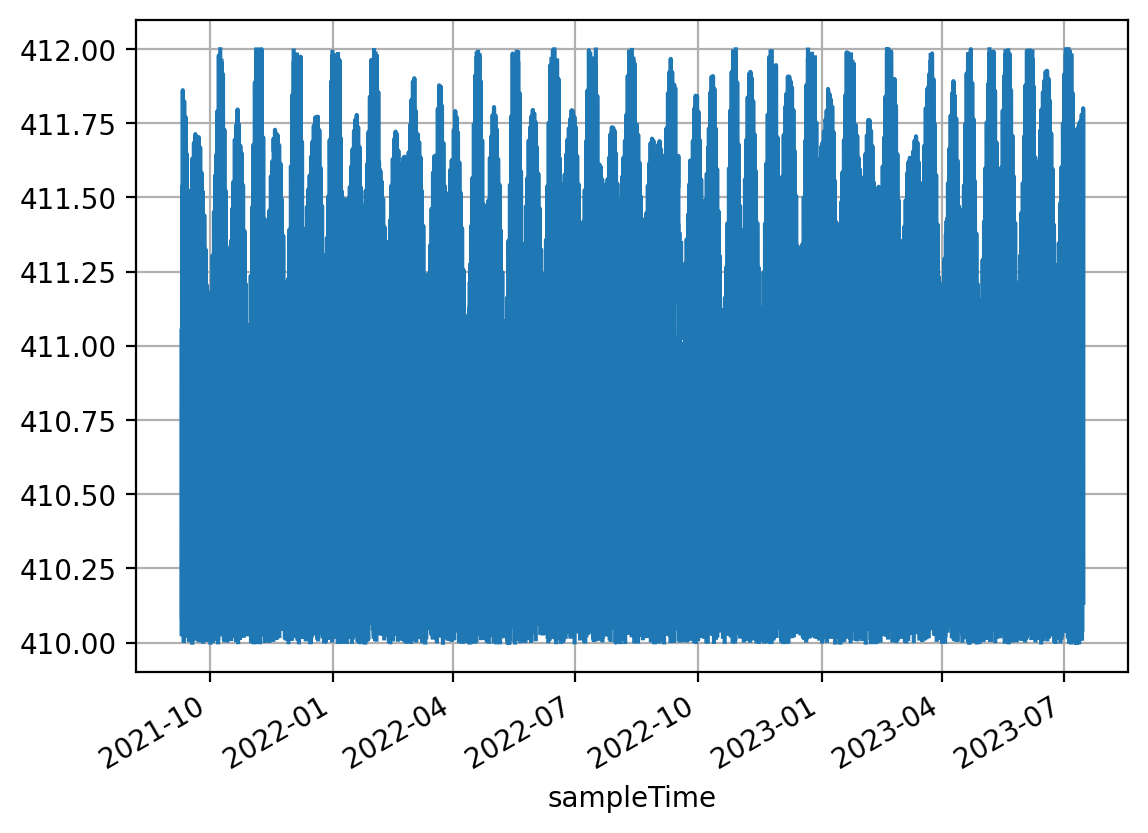

In [46]:
df['value'].plot(grid=True)

In [47]:
import numpy as np
from scipy.optimize import curve_fit
#from scipy.stats import linregress

import matplotlib.pyplot as plt

In [48]:
# Define the exponential decay function with a constant bias
def exponential_func_with_bias(t, A, k, b, C):
    return A * np.exp(k * t) + b*t + C

def exponential_decay_fit(df, p0=None):
    """
    Fit an exponential decay curve with a constant bias to a Pandas DataFrame with 'value' and 't' columns.

    Args:
        df (pd.DataFrame): DataFrame with 'value' and 't' columns.
        p0 (tuple, optional): Initial guess for parameters (A, k, C). If not provided, initial guesses will be determined automatically.
        
    Returns:
        tuple: A tuple containing three elements:
            1. A numpy array representing the fitted exponential decay values.
            2. A tuple of optimized parameters (A, k, C) where:
                - A: Amplitude of the decay.
                - k: Decay rate (negative).
                - C: Constant bias term.

    Raises:
        ValueError: If the DataFrame does not contain 'value' and 't' columns.

    Example:
        df = pd.DataFrame({'t': [0, 1, 2, 3, 4, 5],
                           'value': [100, 73, 54, 40, 29, 21]})
        result, params = exponential_decay_fit_with_bias_and_guess(df)
        print(params)  # (106.30146425934762, -0.3709485189378329, 15.03453660968328)
    """
    # Check if 'value' and 't' columns exist in the DataFrame
    if 'value' not in df.columns or 't' not in df.columns:
        raise ValueError("DataFrame must contain 'value' and 't' columns.")

    # Extract the data from the DataFrame
    t_data = df['t'].values
    value_data = df['value'].values

    # Fit the data to the exponential function with a constant bias
    params, covariance = curve_fit(exponential_func_with_bias, t_data, value_data, p0=p0, maxfev=10000)

    # Get the optimized parameters
    A, k, b, C = params

    # Generate the fitted curve
    fitted_values = exponential_func_with_bias(t_data, A, k, b, C)

    # Plot the original data and the fitted curve
    plt.figure(figsize=(8, 6))
    plt.scatter(t_data, value_data, label='Data', color='blue')
    plt.plot(t_data, fitted_values, label='Fitted Curve', color='red')
    plt.xlabel('Time (s)')
    plt.ylabel('Value')
    plt.legend()
    plt.title('Exponential Decay Fit with Bias')
    plt.show()

    return fitted_values, params


def estimate_decay_rate(df):
    """
    Estimate the decay rate (k) for an exponential decay model using fitting and plot the results.

    Args:
        df (pd.DataFrame): DataFrame with 'value' and 't' columns.
        
    Returns:
        float: Estimated decay rate (k).

    Raises:
        ValueError: If the DataFrame does not contain 'value' and 't' columns.

    Example:
        df = pd.DataFrame({'t': [0, 1, 2, 3, 4, 5],
                           'value': [100, 73, 54, 40, 29, 21]})
        estimated_k = estimate_decay_rate_with_plot(df)
        print(estimated_k)  # Approximately -0.413
    """
    # Check if 'value' and 't' columns exist in the DataFrame
    if 'value' not in df.columns or 't' not in df.columns:
        raise ValueError("DataFrame must contain 'value' and 't' columns.")

    # Extract the data from the DataFrame
    t_data = df['t'].values
    value_data = df['value'].values

    # Take the natural logarithm of the values
    ln_value_data = np.log(value_data)

    # Fit an exponential decay model to the logarithmic data using polyfit
    coeffs = np.polyfit(t_data, ln_value_data, 1)

    # The coefficient is the decay rate (k)
    estimated_k = coeffs[0]

    # Calculate the fitted values
    fitted_values = np.exp(coeffs[1]) * np.exp(estimated_k * t_data)

    # Plot the original data and the fitted curve
    plt.figure(figsize=(8, 6))
    plt.scatter(t_data, value_data, label='Data', color='blue')
    plt.plot(t_data, fitted_values, label='Fitted Curve', color='red')
    plt.xlabel('Time (s)')
    plt.ylabel('Value')
    plt.legend()
    plt.title('Exponential Decay Fit with Estimated k')
    plt.grid(True)
    plt.show()

    return estimated_k



## Find calibrations

In [61]:
url = 'https://data.oceannetworks.ca/api/scalardata'
params = {'method': 'getByDevice',
            'token': os.environ['ONC_TOKEN'],
            'outputFormat': 'object',
            'deviceCode': deviceCode,
            #'rowLimit' : 10000,
            'sensorCategoryCodes': 'systemstatus',
            'dateFrom': '2021-09-09T00:09:30.504Z',
            'fillGaps': 'false'
            }

response = s.get(url=url, params=params)

In [62]:
cal = pd.DataFrame(response.json()['sensorData'][0]['data'])
cal.index = pd.to_datetime(cal['sampleTime'])
cal['t'] = (cal.index - cal.index[0]).total_seconds()
cal

qaqcFlag                sampleTime  value  \
sampleTime                                                                    
2021-09-13 23:35:29.169000+00:00         0  2021-09-13T23:35:29.169Z    0.0   
2021-09-13 23:36:39.584000+00:00         0  2021-09-13T23:36:39.584Z    1.0   
2021-09-13 23:47:41.801000+00:00         0  2021-09-13T23:47:41.801Z    0.0   
2021-09-28 23:35:39.584000+00:00         0  2021-09-28T23:35:39.584Z    1.0   
2021-09-28 23:46:41.776000+00:00         0  2021-09-28T23:46:41.776Z    0.0   
...                                    ...                       ...    ...   
2023-07-03 16:06:25.970000+00:00         0  2023-07-03T16:06:25.970Z    0.0   
2023-07-06 22:51:02.485000+00:00         0  2023-07-06T22:51:02.485Z    0.0   
2023-07-06 22:52:12.239000+00:00         0  2023-07-06T22:52:12.239Z    1.0   
2023-07-06 22:52:14.921000+00:00         0  2023-07-06T22:52:14.921Z    0.0   
2023-07-06 23:03:14.420000+00:00         0  2023-07-06T23:03:14.420Z    0.0   

                                             t  
sampleTime                                      
2021-09-13 23:35:29.169000+00:00  0.000000e+00  
2021-09-13 23:36:39.584000+00:00  7.041500e+01  
2021-09-13 23:47:41.801000+00:00  7.326320e+02  
2021-09-28 23:35:39.584000+00:00  1.296010e+06  
2021-09-28 23:46:41.776000+00:00  1.296673e+06  
...                                        ...  
2023-07-03 16:06:25.970000+00:00  5.682426e+07  
2023-07-06 22:51:02.485000+00:00  5.710773e+07  
2023-07-06 22:52:12.239000+00:00  5.710780e+07  
2023-07-06 22:52:14.921000+00:00  5.710781e+07  
2023-07-06 23:03:14.420000+00:00  5.710847e+07  

[211 rows x 4 columns]

In [63]:
# calibration when value == -1
cal = cal[['value','t']].diff().shift(-1)
cal = cal.loc[cal['value'] == -1]
cal

value        t
sampleTime                                      
2021-09-13 23:36:39.584000+00:00   -1.0  662.217
2021-09-28 23:35:39.584000+00:00   -1.0  662.192
2021-10-13 23:35:39.584000+00:00   -1.0  667.713
2021-10-22 20:20:02.843000+00:00   -1.0  662.230
2021-11-05 17:14:17.228000+00:00   -1.0  662.180
...                                 ...      ...
2023-05-20 15:56:20.690000+00:00   -1.0  667.681
2023-06-03 15:55:12.737000+00:00   -1.0  667.674
2023-06-18 15:55:18.230000+00:00   -1.0  662.224
2023-07-03 15:55:18.229000+00:00   -1.0  667.741
2023-07-06 22:52:12.239000+00:00   -1.0    2.682

[95 rows x 2 columns]

In [64]:
def datetime2onc(dt):
    return dt.strftime('%Y-%m-%dT%H:%M:%S.%f')[:-3]+'Z'

In [66]:
cals = {}

for ct in cal.index:
    print(ct)
    dt = pd.Timedelta('900s')
    t_start = datetime2onc(ct)
    t_end = datetime2onc(ct+dt)
    
    url = 'https://data.oceannetworks.ca/api/scalardata'
    params = {'method': 'getByDevice',
                'token': os.environ['ONC_TOKEN'],
                'outputFormat': 'object',
                'deviceCode':deviceCode ,
                'dateFrom': t_start,
                'dateTo': t_end,
                #'sensorCategoryCodes': 'pressure1,pressure4',
                #'resampleType': 'avg',
                #'resamplePeriod': 60, #900
                #'dateTo': '2023-09-15T00:00:00.000Z'
                }
    
    response = s.get(url=url, params=params)
    
    cal_dat = pd.DataFrame()
    #dfs = [pd.DataFrame(col['data']) for col in ]

    for col in response.json()['sensorData']:
        cal_dat[col['sensorName']] = pd.DataFrame(col['data'])['value']

    cal_dat['sample time'] = pd.to_datetime(pd.DataFrame(col['data'])['sampleTime'])
    cal_dat.index = (cal_dat['Instrument Clock'] - cal_dat['Instrument Clock'][0])*(24*3600) #.dt.total_seconds()
    #cal_dat = pd.DataFrame([col['value'] for col in dfs], columns=['a','b'])
    #cal_dat = pd.DataFrame(response.json()['sensorData'][0]['data'])
    #cal_dat.index = pd.to_datetime(cal_dat['sampleTime'])
    #cal_dat['t'] = (cal_dat.index - cal_dat.index[0]).total_seconds()
    
    # calibrated pressure timeseries
    cals[ct] = (cal_dat['AZA Raw Pressure']-cal_dat['AZA Reference Pressure'])

2021-09-13 23:36:39.584000+00:00
2021-09-28 23:35:39.584000+00:00
2021-10-13 23:35:39.584000+00:00
2021-10-22 20:20:02.843000+00:00
2021-11-05 17:14:17.228000+00:00
2021-11-20 17:13:11.728000+00:00
2021-11-25 11:20:14.715000+00:00
2021-12-06 11:19:06.720000+00:00
2021-12-21 11:19:12.207000+00:00
2022-01-05 11:19:06.705000+00:00
2022-01-20 11:19:12.205000+00:00
2022-02-04 11:19:06.705000+00:00
2022-02-19 11:19:12.227000+00:00
2022-03-06 11:19:12.206000+00:00
2022-03-21 11:19:12.207000+00:00
2022-04-05 11:19:12.205000+00:00
2022-04-05 16:48:27.995000+00:00
2022-04-20 16:47:33.499000+00:00
2022-05-05 16:47:33.497000+00:00
2022-05-20 16:47:33.498000+00:00
2022-06-04 16:47:28.008000+00:00
2022-06-08 20:57:24.806000+00:00
2022-06-15 00:24:55.387000+00:00
2022-06-30 00:24:00.890000+00:00
2022-07-15 00:24:00.891000+00:00
2022-07-30 00:24:00.890000+00:00
2022-08-05 21:41:34.094000+00:00
2022-08-14 21:40:37.104000+00:00
2022-08-29 21:40:37.103000+00:00
2022-09-12 22:18:31.330000+00:00
2022-09-13

In [67]:
a = pd.DataFrame() #index=pd.Index(range(1790))
keys = list(cals.keys())
for key in keys:
    #print(len(cals[key]))
    a[key] = cals[key].iloc[0:-1].reset_index(drop=True)

#a = cals[keys[0]]
#a.reindex_like(pd.NumericIndex(np.arange(0, 600, 0.125)))

In [68]:
a.index = a.index/8

In [69]:
a
#a

2021-09-13 23:36:39.584000+00:00  2021-09-28 23:35:39.584000+00:00  \
0.000                          401.878943                        401.507324   
0.125                          401.875279                        401.510731   
0.250                          401.877962                        401.509628   
0.375                          401.876235                        401.506209   
0.500                          401.877316                        401.509879   
...                                   ...                               ...   
899.000                        401.907177                        401.535440   
899.125                        401.910650                        401.533290   
899.250                        401.906924                        401.537482   
899.375                        401.907332                        401.533654   
899.500                        401.907271                        401.537196   

         2021-10-13 23:35:39.584000+00:00  2021-10-22 20:20:02.843000+00:00  \
0.000                          401.371124                        402.050154   
0.125                          401.367728                        402.050146   
0.250                          401.371355                        402.049730   
0.375                          401.372002                        402.047031   
0.500                          401.368845                        402.047866   
...                                   ...                               ...   
899.000                        401.437672                        402.085329   
899.125                        401.435327                        402.085049   
899.250                        401.435666                        402.085499   
899.375                        401.435048                        402.085456   
899.500                        401.433948                        402.087384   

         2021-11-05 17:14:17.228000+00:00  2021-11-20 17:13:11.728000+00:00  \
0.000                          401.372344                        401.164055   
0.125                          401.375642                        401.163959   
0.250                          401.372150                        401.165146   
0.375                          401.375190                        401.167130   
0.500                          401.370290                        111.948019   
...                                   ...                               ...   
899.000                        401.538813                        401.274310   
899.125                        401.542419                        401.274465   
899.250                        401.540509                        401.277184   
899.375                        401.541655                        401.272884   
899.500                        401.541184                        401.278359   

         2021-11-25 11:20:14.715000+00:00  2021-12-06 11:19:06.720000+00:00  \
0.000                          401.175216                        401.592363   
0.125                          401.184850                        401.590571   
0.250                          401.184533                        401.590915   
0.375                          401.179944                        401.590599   
0.500                          401.180715                        114.223517   
...                                   ...                               ...   
899.000                        401.225630                        401.512871   
899.125                        401.226911                        401.517010   
899.250                        401.225601                        401.514184   
899.375                        401.225729                        401.515695   
899.500                        401.225128                        401.516940   

         2021-12-21 11:19:12.207000+00:00  2022-01-05 11:19:06.705000+00:00  \
0.000                          401.454803                        401.802199   
0.125                          401.450570              

<Axes: xlabel='Time after start of calibration (s)', ylabel='Transfer Pressure  - Reference Pressure (dbar)'>

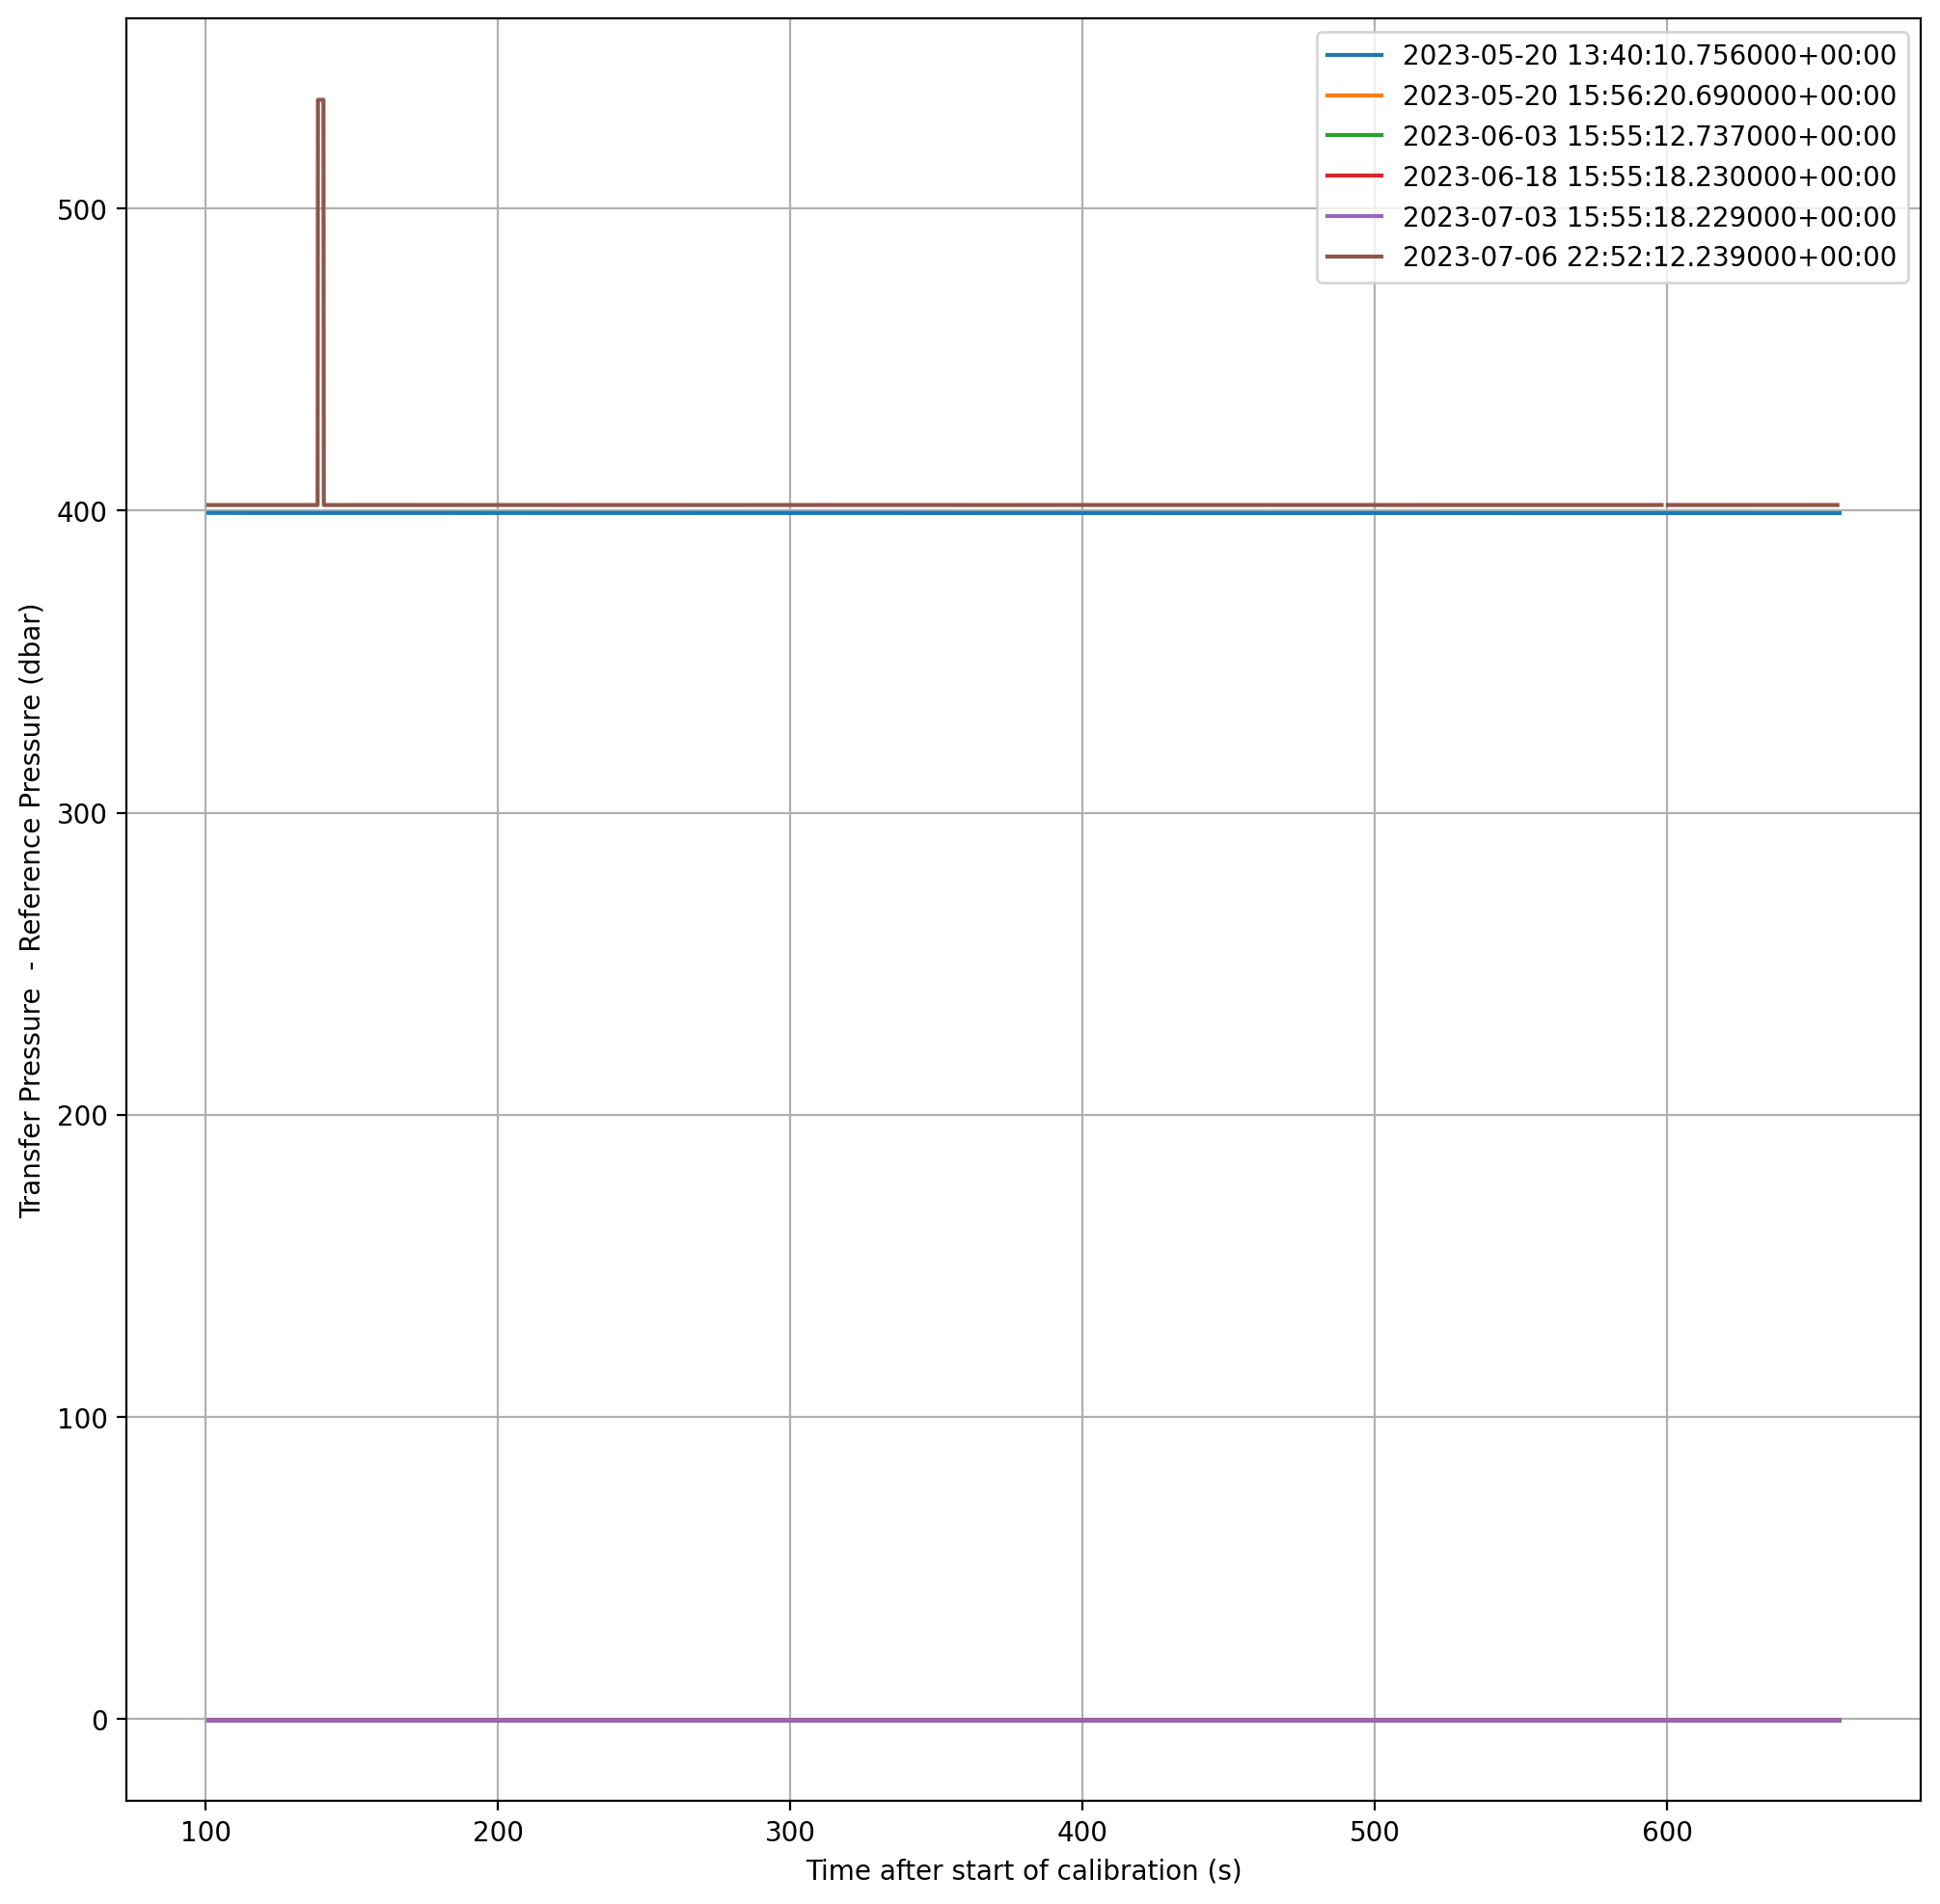

In [70]:
#np.log(a.iloc[8*35:660*8]).plot(figsize=(12,8), grid=True)
a.iloc[800:660*8,-6:].rolling(16, center=True).mean().plot(figsize=(12,12), 
                                                           grid=True, legend=True,
                                                           xlabel='Time after start of calibration (s)',
                                                           ylabel='Transfer Pressure  - Reference Pressure (dbar)')
#plt.xscale('log')
#plt.yscale('log')


<Axes: xlabel='Time after start of calibration (s)', ylabel='Transfer Pressure  - Reference Pressure (dbar)'>

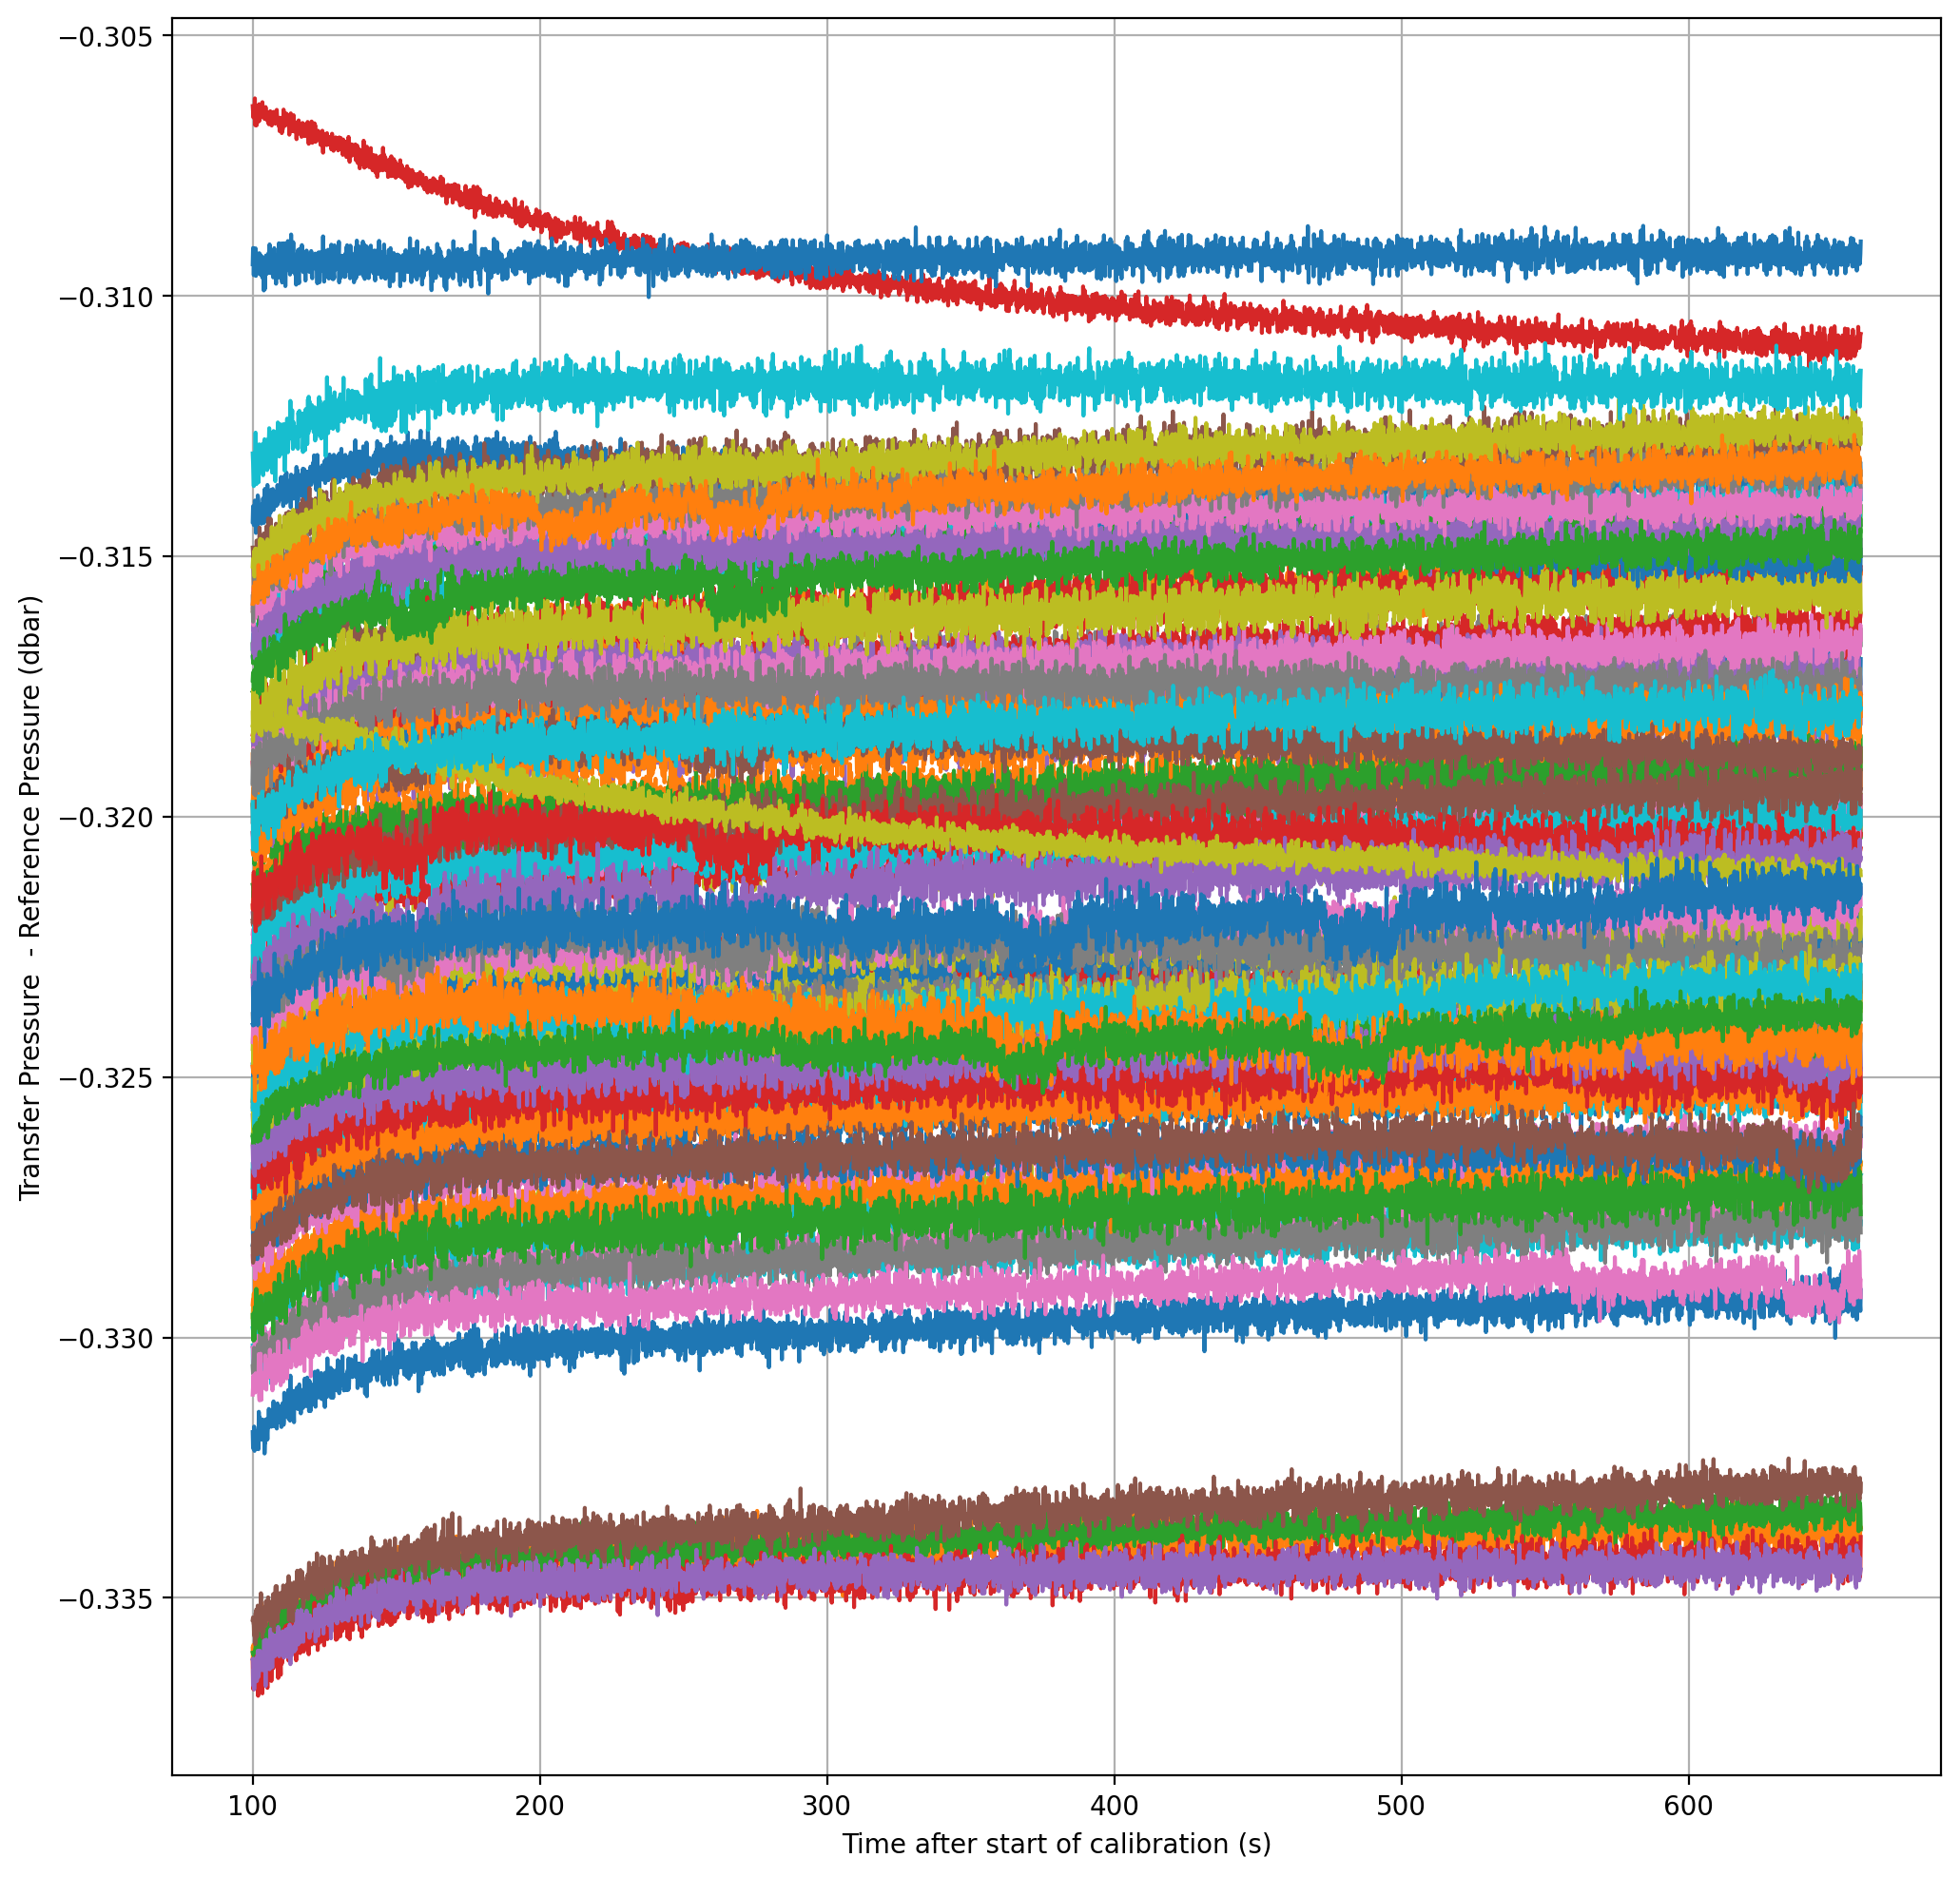

In [71]:
b = a.rolling(16, center=True).mean().iloc[800:660*8,:]
b = b.loc[:,b.max()< 100]
b.plot(figsize=(12,12), grid=True, legend=False,
            xlabel='Time after start of calibration (s)',
            ylabel='Transfer Pressure  - Reference Pressure (dbar)')

In [72]:
b.loc[:,b.max()< 100]

2021-09-28 23:35:39.584000+00:00  2021-10-13 23:35:39.584000+00:00  \
100.000                         -0.316939                         -0.318805   
100.125                         -0.316993                         -0.319124   
100.250                         -0.316882                         -0.318774   
100.375                         -0.316920                         -0.318877   
100.500                         -0.316949                         -0.318496   
...                                   ...                               ...   
659.375                         -0.313340                         -0.315011   
659.500                         -0.313531                         -0.315031   
659.625                         -0.313220                         -0.314965   
659.750                         -0.313194                         -0.315369   
659.875                         -0.313438                         -0.315281   

         2021-10-22 20:20:02.843000+00:00  2021-11-05 17:14:17.228000+00:00  \
100.000                         -0.317604                         -0.318426   
100.125                         -0.317612                         -0.318395   
100.250                         -0.317800                         -0.318686   
100.375                         -0.317883                         -0.318209   
100.500                         -0.317643                         -0.318670   
...                                   ...                               ...   
659.375                         -0.314460                         -0.315557   
659.500                         -0.314401                         -0.315323   
659.625                         -0.314304                         -0.315770   
659.750                         -0.314555                         -0.315295   
659.875                         -0.314040                         -0.315209   

         2021-11-20 17:13:11.728000+00:00  2021-11-25 11:20:14.715000+00:00  \
100.000                         -0.321853                         -0.316051   
100.125                         -0.321925                         -0.315934   
100.250                         -0.321497                         -0.316049   
100.375                         -0.321592                         -0.315956   
100.500                         -0.321545                         -0.315931   
...                                   ...                               ...   
659.375                         -0.319887                         -0.319301   
659.500                         -0.320174                         -0.319416   
659.625                         -0.319441                         -0.319265   
659.750                         -0.319813                         -0.319500   
659.875                         -0.320320                         -0.319466   

         2021-12-06 11:19:06.720000+00:00  2021-12-21 11:19:12.207000+00:00  \
100.000                         -0.326291                         -0.325462   
100.125                         -0.326398                         -0.325415   
100.250                         -0.326196                         -0.325489   
100.375                         -0.325887                         -0.325678   
100.500                         -0.326363                         -0.325393   
...                                   ...                               ...   
659.375                         -0.323640                         -0.322450   
659.500                         -0.324192                         -0.322713   
659.625                         -0.324068                         -0.322122   
659.750                         -0.323596                         -0.322642   
659.875                         -0.323194                         -0.322370   

         2022-01-05 11:19:06.705000+00:00  2022-01-20 11:19:12.205000+00:00  \
100.000                         -0.325446                         -0.330153   
100.125                         -0.325155              

<Axes: >

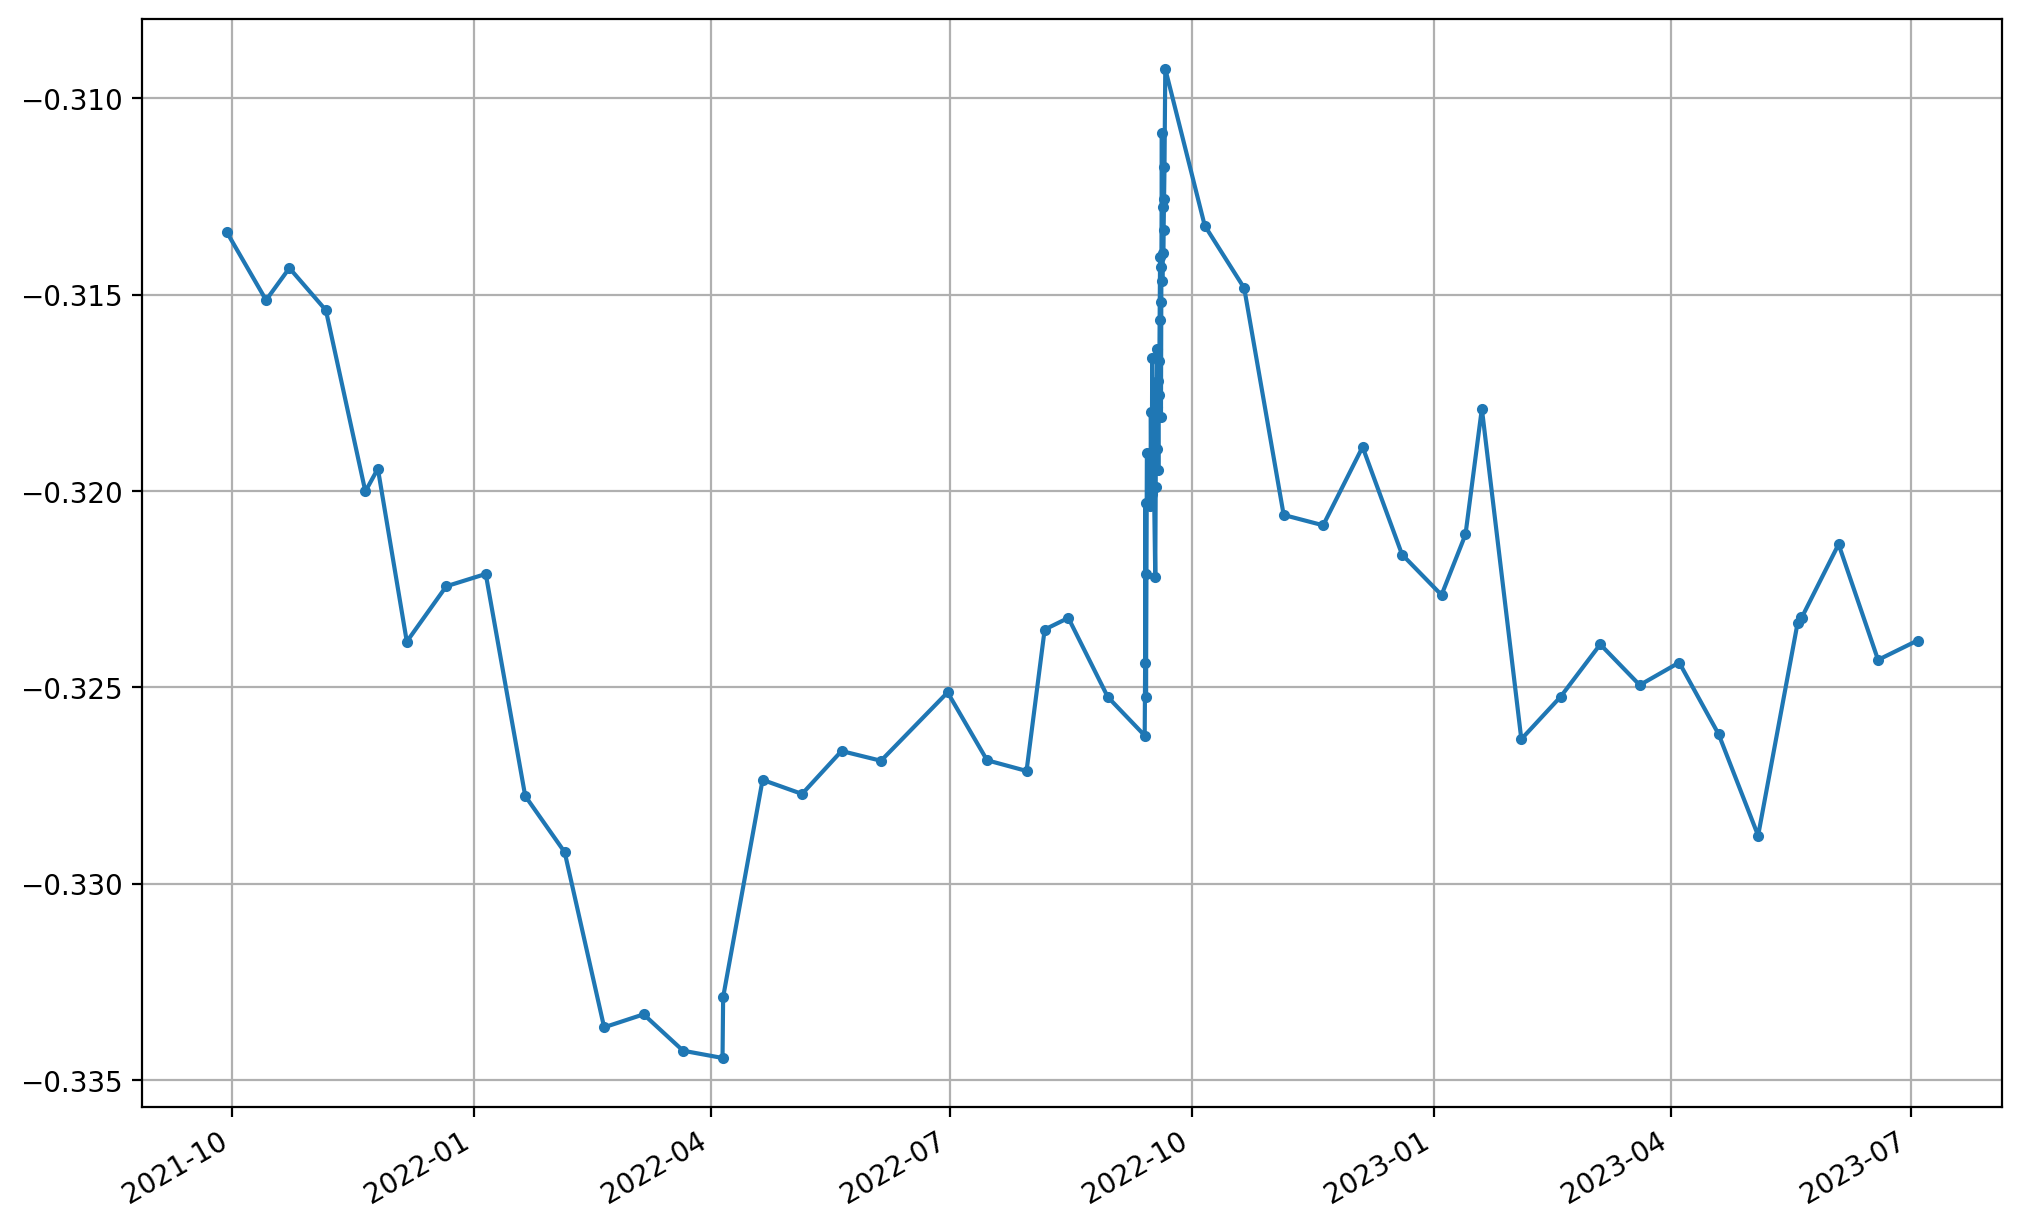

In [73]:
b.iloc[-15:,:].mean().plot(figsize=(12,8), grid=True, marker='.')

### get the data from different locations

In [83]:
def getData(locationCode, deviceCategoryCode, sensorCategoryCodes = 'pressure', dateFrom = '2009-08-01T00:00:00.000Z', session = None):

    url = 'http://data.oceannetworks.ca/api/scalardata'

    params = {
        'method': 'getByLocation',
        'token': os.environ['ONC_TOKEN'],
        'deviceCategoryCode': deviceCategoryCode,
        'locationCode': locationCode,
        'sensorCategoryCodes': sensorCategoryCodes,
        'resamplePeriod': 900,
        'resampleType': 'avgMinMax',
        'dateFrom': dateFrom,
    }
    
    dfs = []

    while 1:
        print(params['dateFrom'])
        if session:
            r = session.get(url, params=params)
        else:
            r = requests.get(url, params=params)
            
        df = pd.DataFrame(r.json()['sensorData'][0]['data'])
        df.index = pd.DatetimeIndex(df['sampleTimes'])
        dfs.append(df)
        try:
            params['dateFrom'] = r.json()['next']['parameters']['dateFrom']
        except TypeError:
            break
        
    return pd.concat(dfs)

In [47]:
#def get_data_by_location(device_category_code='BPR', location_code = 'MEFS', sensor_category_codes='pressure1'): # date_from, date_to, sensor_category_codes,

bpr_z = getData('MEFS', 'BPR', sensorCategoryCodes='pressure1', dateFrom='2023-09-10', session=s)

2023-09-10


In [48]:
enef = getData('ENEF', 'BPR', sensorCategoryCodes='pressure', dateFrom='2023-09-10', session=s)


2023-09-10


In [49]:
kemf = getData('KEMF', 'BPR', sensorCategoryCodes='pressure', dateFrom='2023-09-10', session=s)

2023-09-10


In [50]:
nchr = getData('NCHR', 'BPR', sensorCategoryCodes='pressure', dateFrom='2023-09-10', session=s)

2023-09-10


In [51]:
rcs = getData('RCS', 'BPR', sensorCategoryCodes='pressure', dateFrom='2023-09-10', session=s)   

2023-09-10


In [52]:
kemo = getData('KEMO', 'BPR', sensorCategoryCodes='pressure', dateFrom='2023-09-10', session=s)   

2023-09-10


<Axes: xlabel='sampleTimes'>

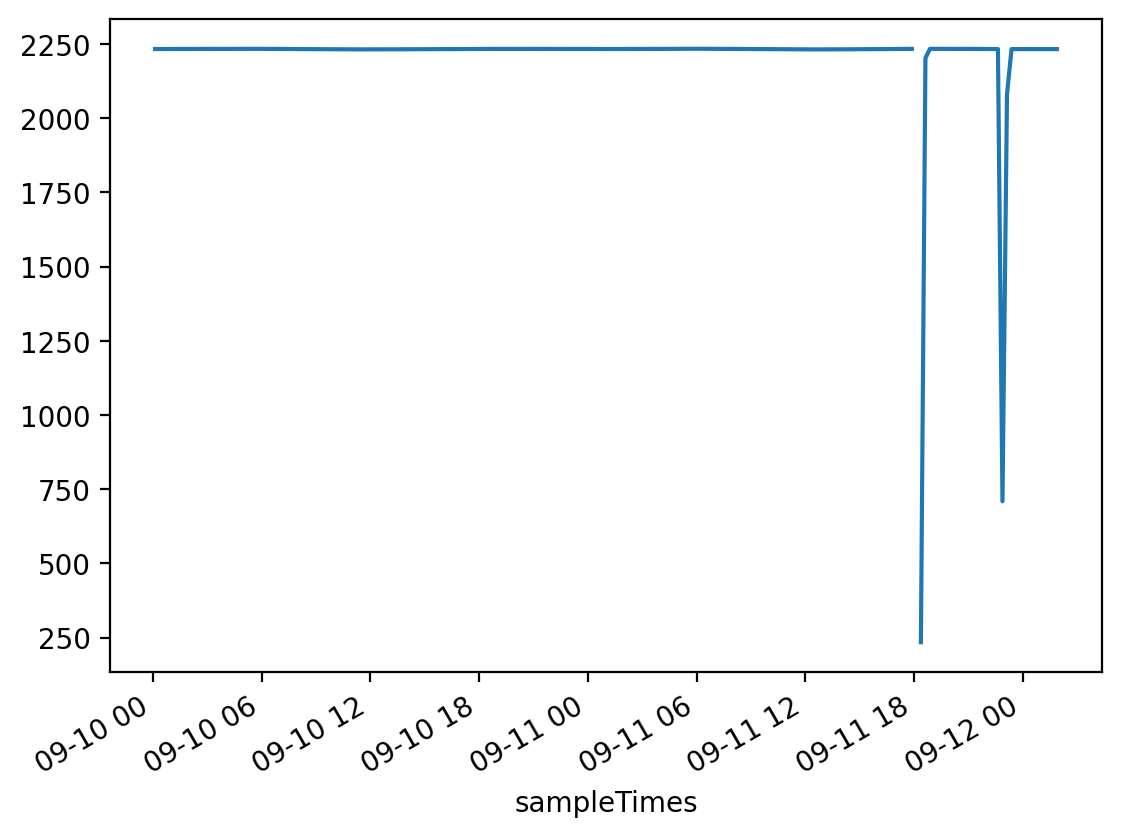

In [ ]:
# show the calibration jumps from BPRZero ambient pressure
bpr_z['values'][0:200].plot()

In [56]:
# clean BPRZero pressure sensor values of calibration jums

bpr_z['cleaned'] = bpr_z['values'].copy()
bpr_z.loc[bpr_z['cleaned']< 2230.5,'cleaned'] = float('nan')

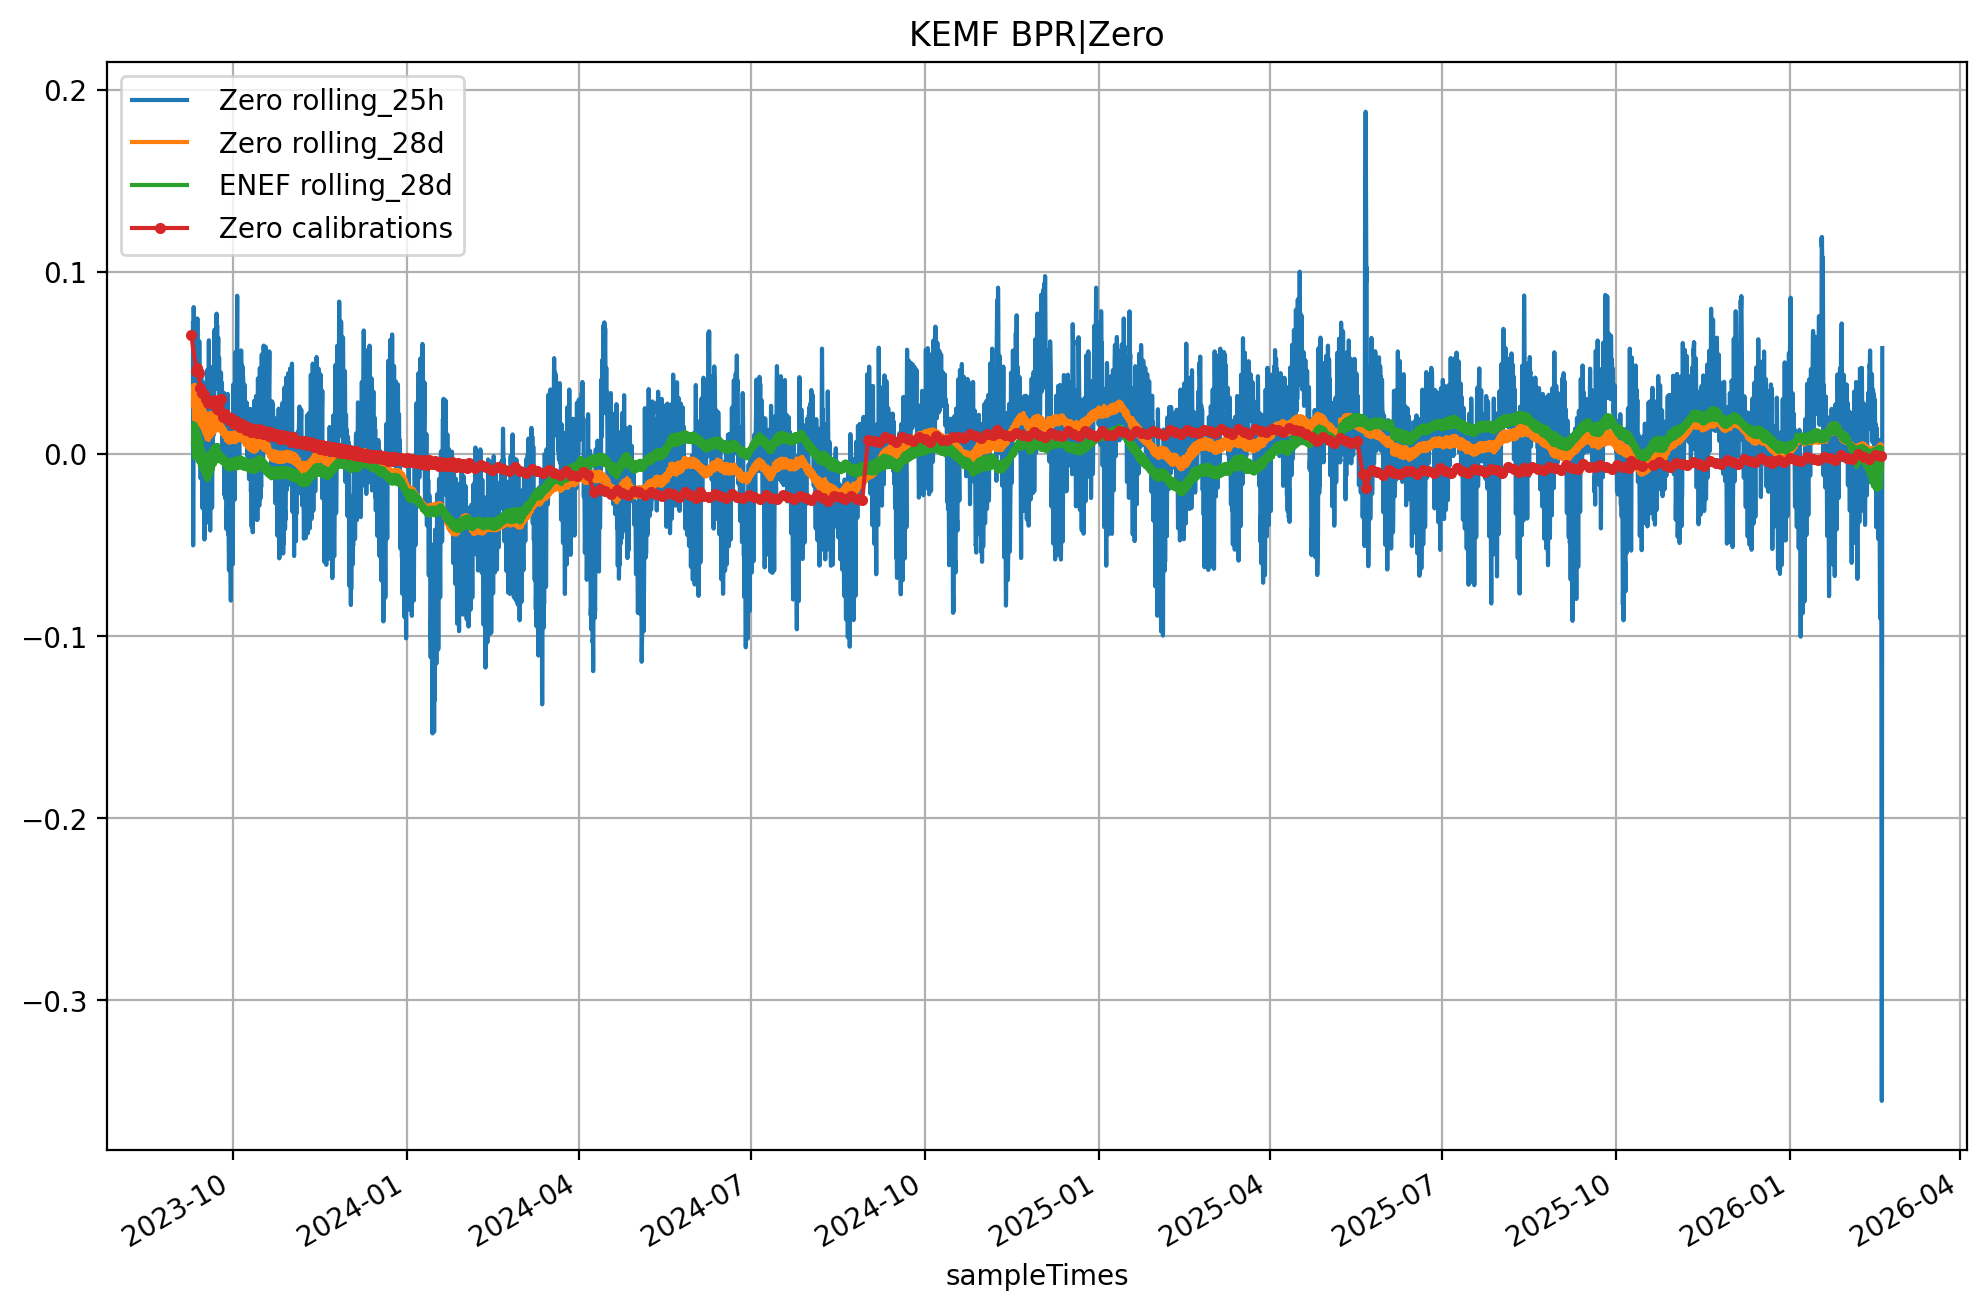

In [59]:


(bpr_z['cleaned']-bpr_z['cleaned'].mean()).rolling('25h', center=True).mean().plot(grid=True, figsize=(12,8),label=' Zero rolling_25h')
(bpr_z['cleaned']-bpr_z['cleaned'].mean()).rolling('28d', center=True).mean().plot(grid=True, figsize=(12,8),label=' Zero rolling_28d')
(enef['values']-enef['values'].mean()).rolling('28d', center=True).mean().plot(grid=True, figsize=(12,8),label=' ENEF rolling_28d')

cal = b.iloc[-15:,:].mean()
(cal - cal.mean()).plot(figsize=(12,8), grid=True, marker='.',label=' Zero calibrations')
plt.title('KEMF BPR|Zero')
plt.legend()


Text(0.5, 1.0, 'East Flank vs Main Endeavour BPR Zero')

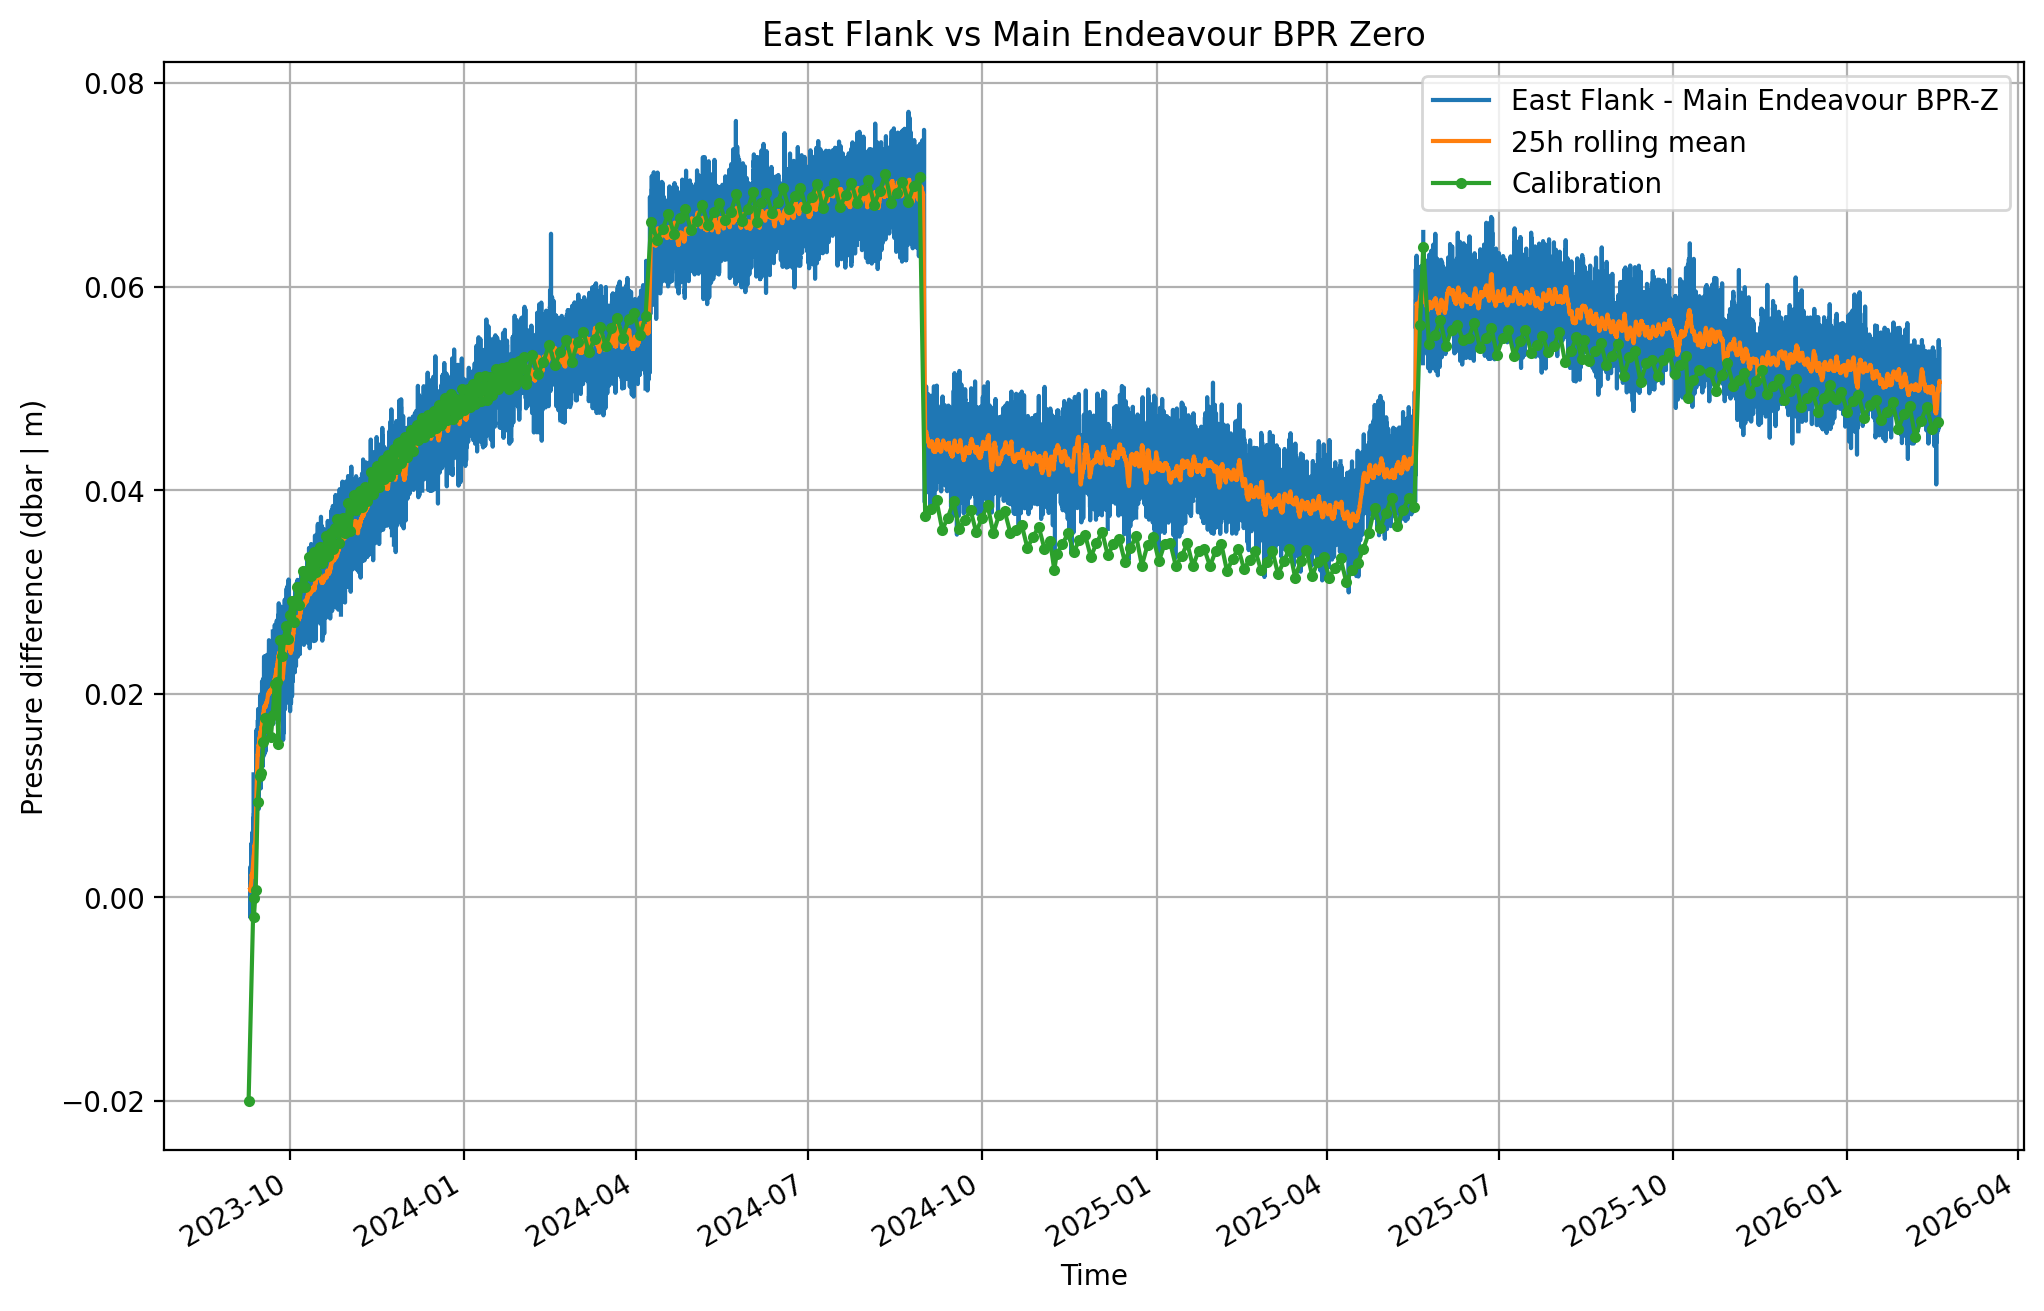

In [61]:
# ENEF comparison
# get ENEF for BPRZero dates and subtract BPRzero pressure
ec_diff = (enef['values'].reindex_like(bpr_z['cleaned'])-bpr_z['cleaned'])

ec_diff = ec_diff - ec_diff.iloc[0]
ec_diff[ec_diff > 0.2] = float('nan')
ec_diff[ec_diff < -0.002] = float('nan')

ax = ec_diff.plot(grid=True, figsize=(12,8), label='East Flank - Main Endeavour BPR-Z')
ec_diff.rolling('25h', center=True).mean().plot(ax=ax,grid=True, figsize=(12,8),label='25h rolling mean')

# adjust the calibrations to fit the drift curve at the beginning (exponential part)
(-1*(cal - cal.iloc[0]) - 0.02).plot(ax = ax, figsize=(12,8), grid=True, marker='.', label='Calibration')

ax.set_xlabel('Time')
ax.set_ylabel('Pressure difference (dbar | m)')
ax.legend()
ax.set_title('East Flank vs Main Endeavour BPR Zero')

Text(0.5, 1.0, 'East Flank vs Main Endeavour BPR Zero')

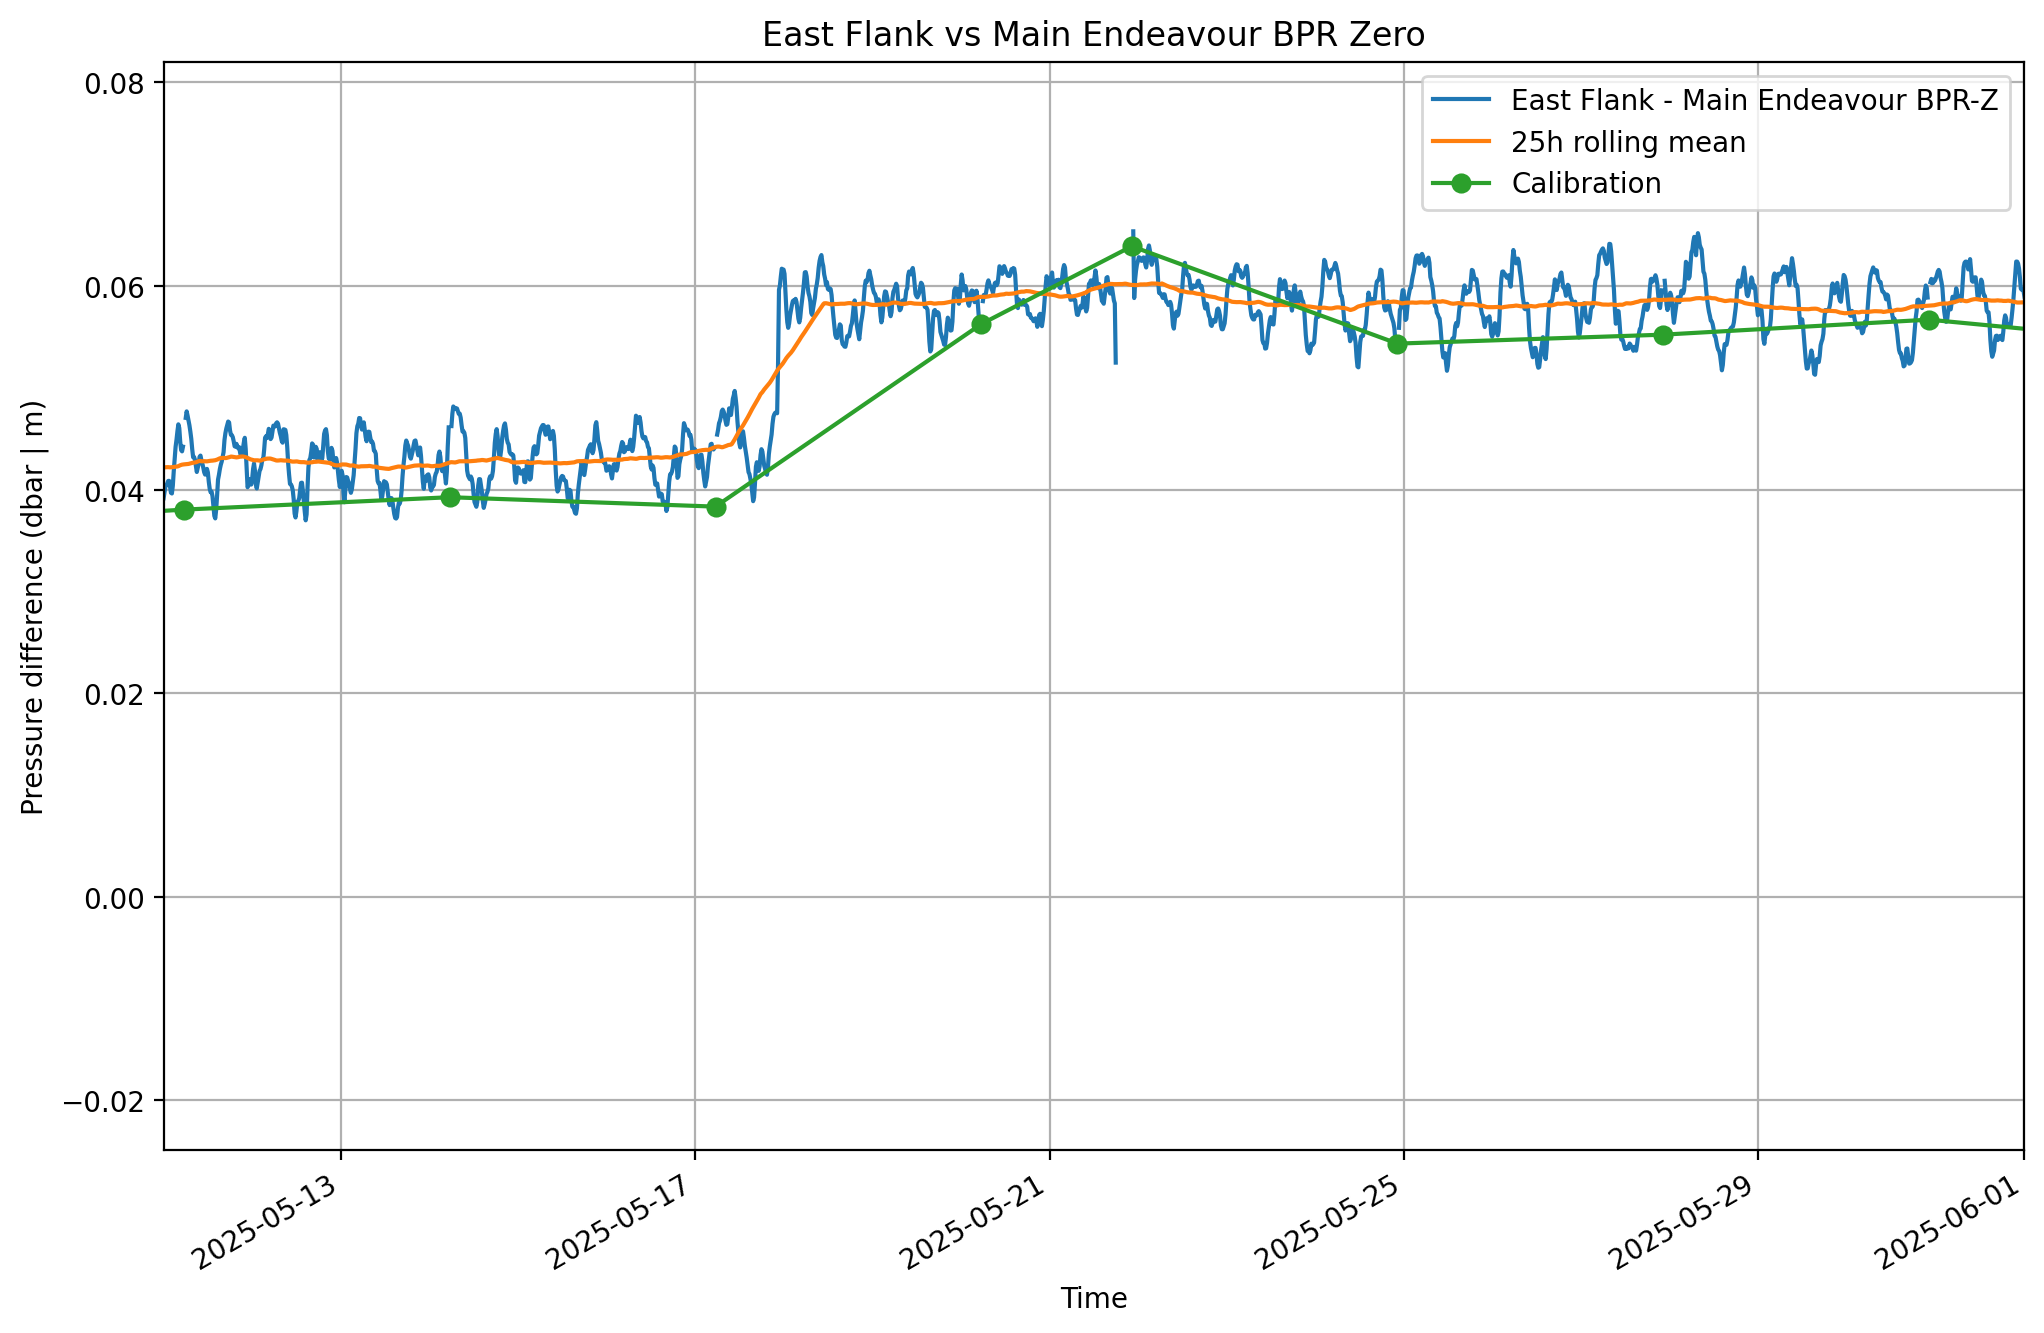

In [ ]:
# ENEF zoom
# get ENEF for BPRZero dates and subtract BPRzero pressure
ec_diff = (enef['values'].reindex_like(bpr_z['cleaned'])-bpr_z['cleaned'])

ec_diff = ec_diff - ec_diff.iloc[0]
ec_diff[ec_diff > 0.2] = float('nan')
ec_diff[ec_diff < -0.002] = float('nan')
ax = ec_diff.plot(grid=True, figsize=(12,8), label='East Flank - Main Endeavour BPR-Z')
ec_diff.rolling('25h', center=True).mean().plot(ax=ax,grid=True, figsize=(12,8),label='25h rolling mean')

(-1*(cal - cal.iloc[0]) - 0.02).plot(ax = ax, figsize=(12,8), grid=True, marker='.',markersize=12.5, label='Calibration')

ax.set_xlabel('Time')
ax.set_xlim(['2025-05-11 00:00','2025-06-01 00:00'])
ax.set_ylabel('Pressure difference (dbar | m)')
ax.legend()
ax.set_title('East Flank vs Main Endeavour BPR Zero')

Text(0.5, 1.0, 'KEMF NRCAN vs Main Endeavour BPR Zero')

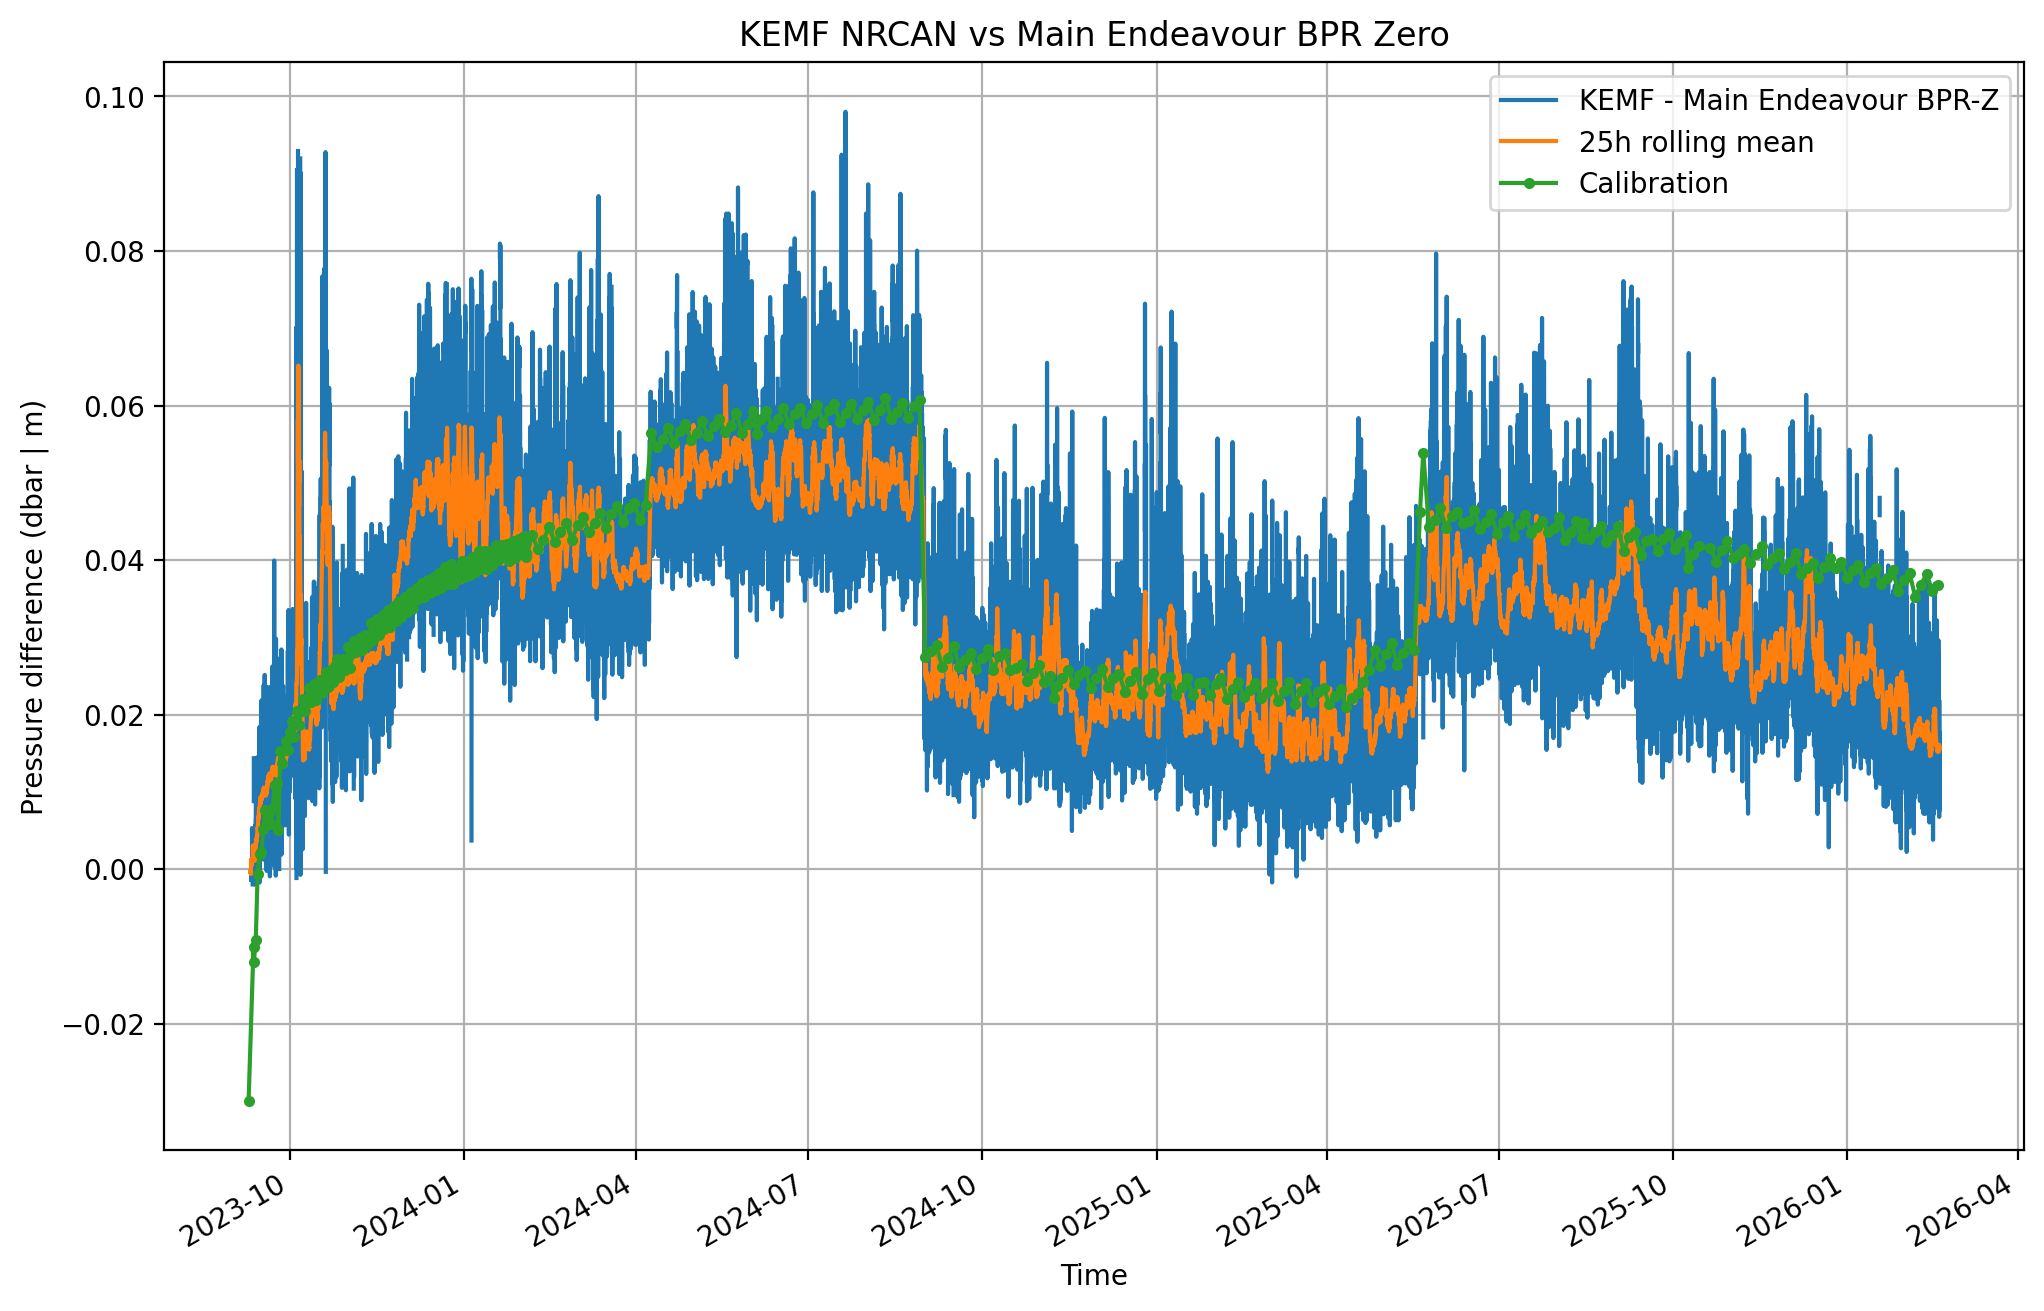

In [75]:
#KEMF NRCAN 
# get KEMF for BPRZero dates and subtract BPRzero pressure
ec_diff = (kemf['values'].reindex_like(bpr_z['cleaned'])-bpr_z['cleaned'])

ec_diff = ec_diff - ec_diff.iloc[0]
ec_diff[ec_diff > 0.1] = float('nan')
ec_diff[ec_diff < -0.002] = float('nan')
ax = ec_diff.plot(grid=True, figsize=(12,8), label='KEMF - Main Endeavour BPR-Z')
ec_diff.rolling('25h', center=True).mean().plot(ax=ax,grid=True, figsize=(12,8),label='25h rolling mean')

(-1*(cal - cal.iloc[0]) - 0.03).plot(ax = ax, figsize=(12,8), grid=True, marker='.', label='Calibration')

ax.set_xlabel('Time')
ax.set_ylabel('Pressure difference (dbar | m)')
ax.legend()
ax.set_title('KEMF NRCAN vs Main Endeavour BPR Zero')



Text(0.5, 1.0, 'RCS NRCAN vs Main Endeavour BPR Zero')

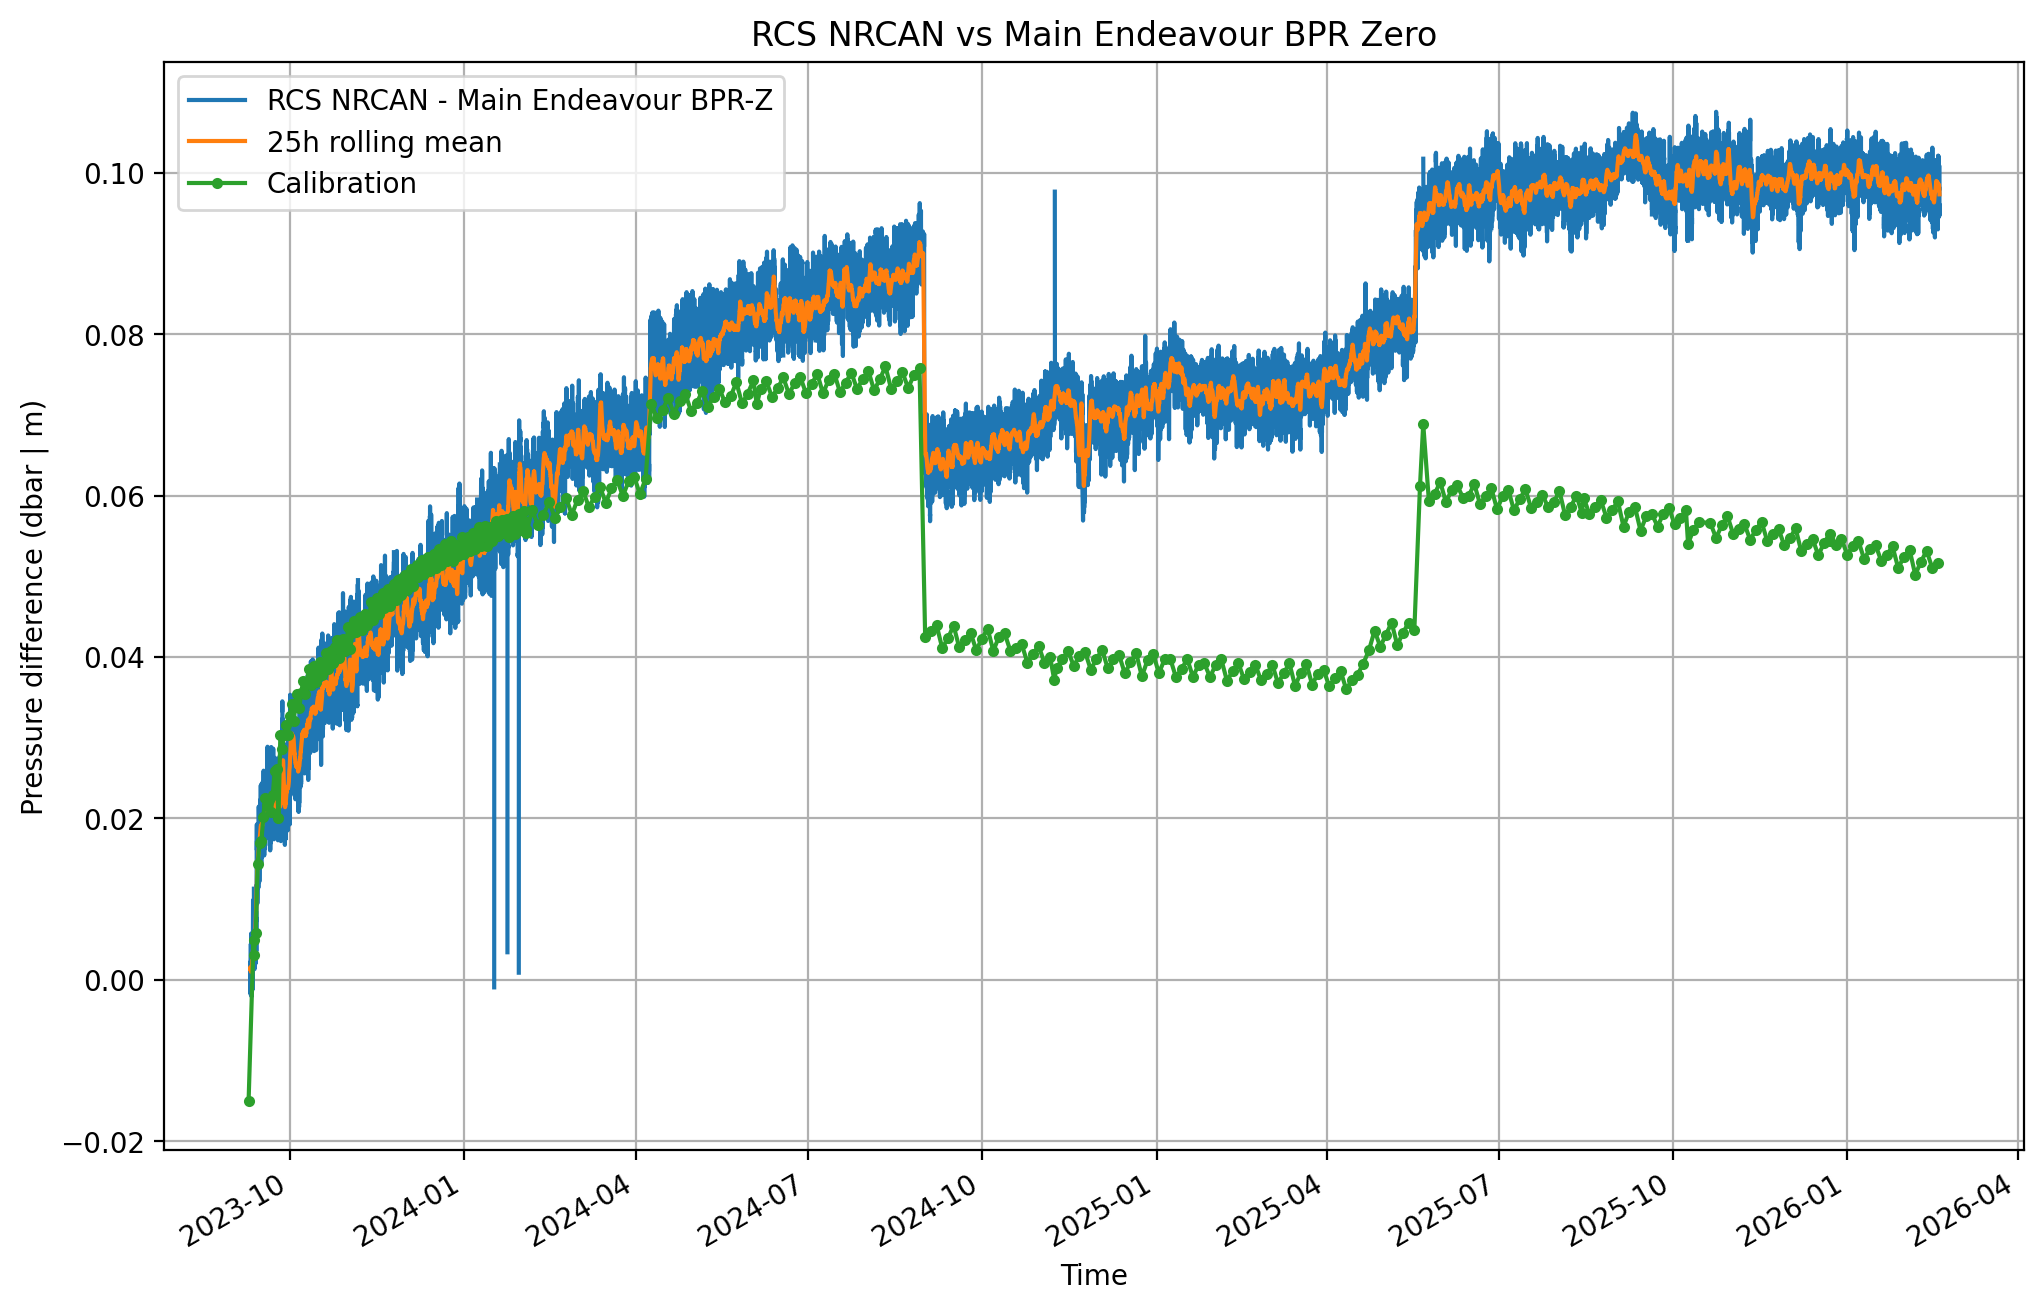

In [76]:
#RCS NRCAN
# get RCS for BPRZero dates and subtract BPRzero pressure
ec_diff = (rcs['values'].reindex_like(bpr_z['cleaned'])-bpr_z['cleaned'])

ec_diff = ec_diff - ec_diff.iloc[0]
ec_diff[ec_diff > 0.2] = float('nan')
ec_diff[ec_diff < -0.002] = float('nan')
ax = ec_diff.plot(grid=True, figsize=(12,8), label='RCS NRCAN - Main Endeavour BPR-Z')
ec_diff.rolling('25h', center=True).mean().plot(ax=ax,grid=True, figsize=(12,8),label='25h rolling mean')

(-1*(cal - cal.iloc[0]) - 0.015).plot(ax = ax, figsize=(12,8), grid=True, marker='.', label='Calibration')

ax.set_xlabel('Time')
ax.set_ylabel('Pressure difference (dbar | m)')
ax.legend()
ax.set_title('RCS NRCAN vs Main Endeavour BPR Zero')



Text(0.5, 1.0, 'NCHR NRCAN vs Main Endeavour BPR Zero')

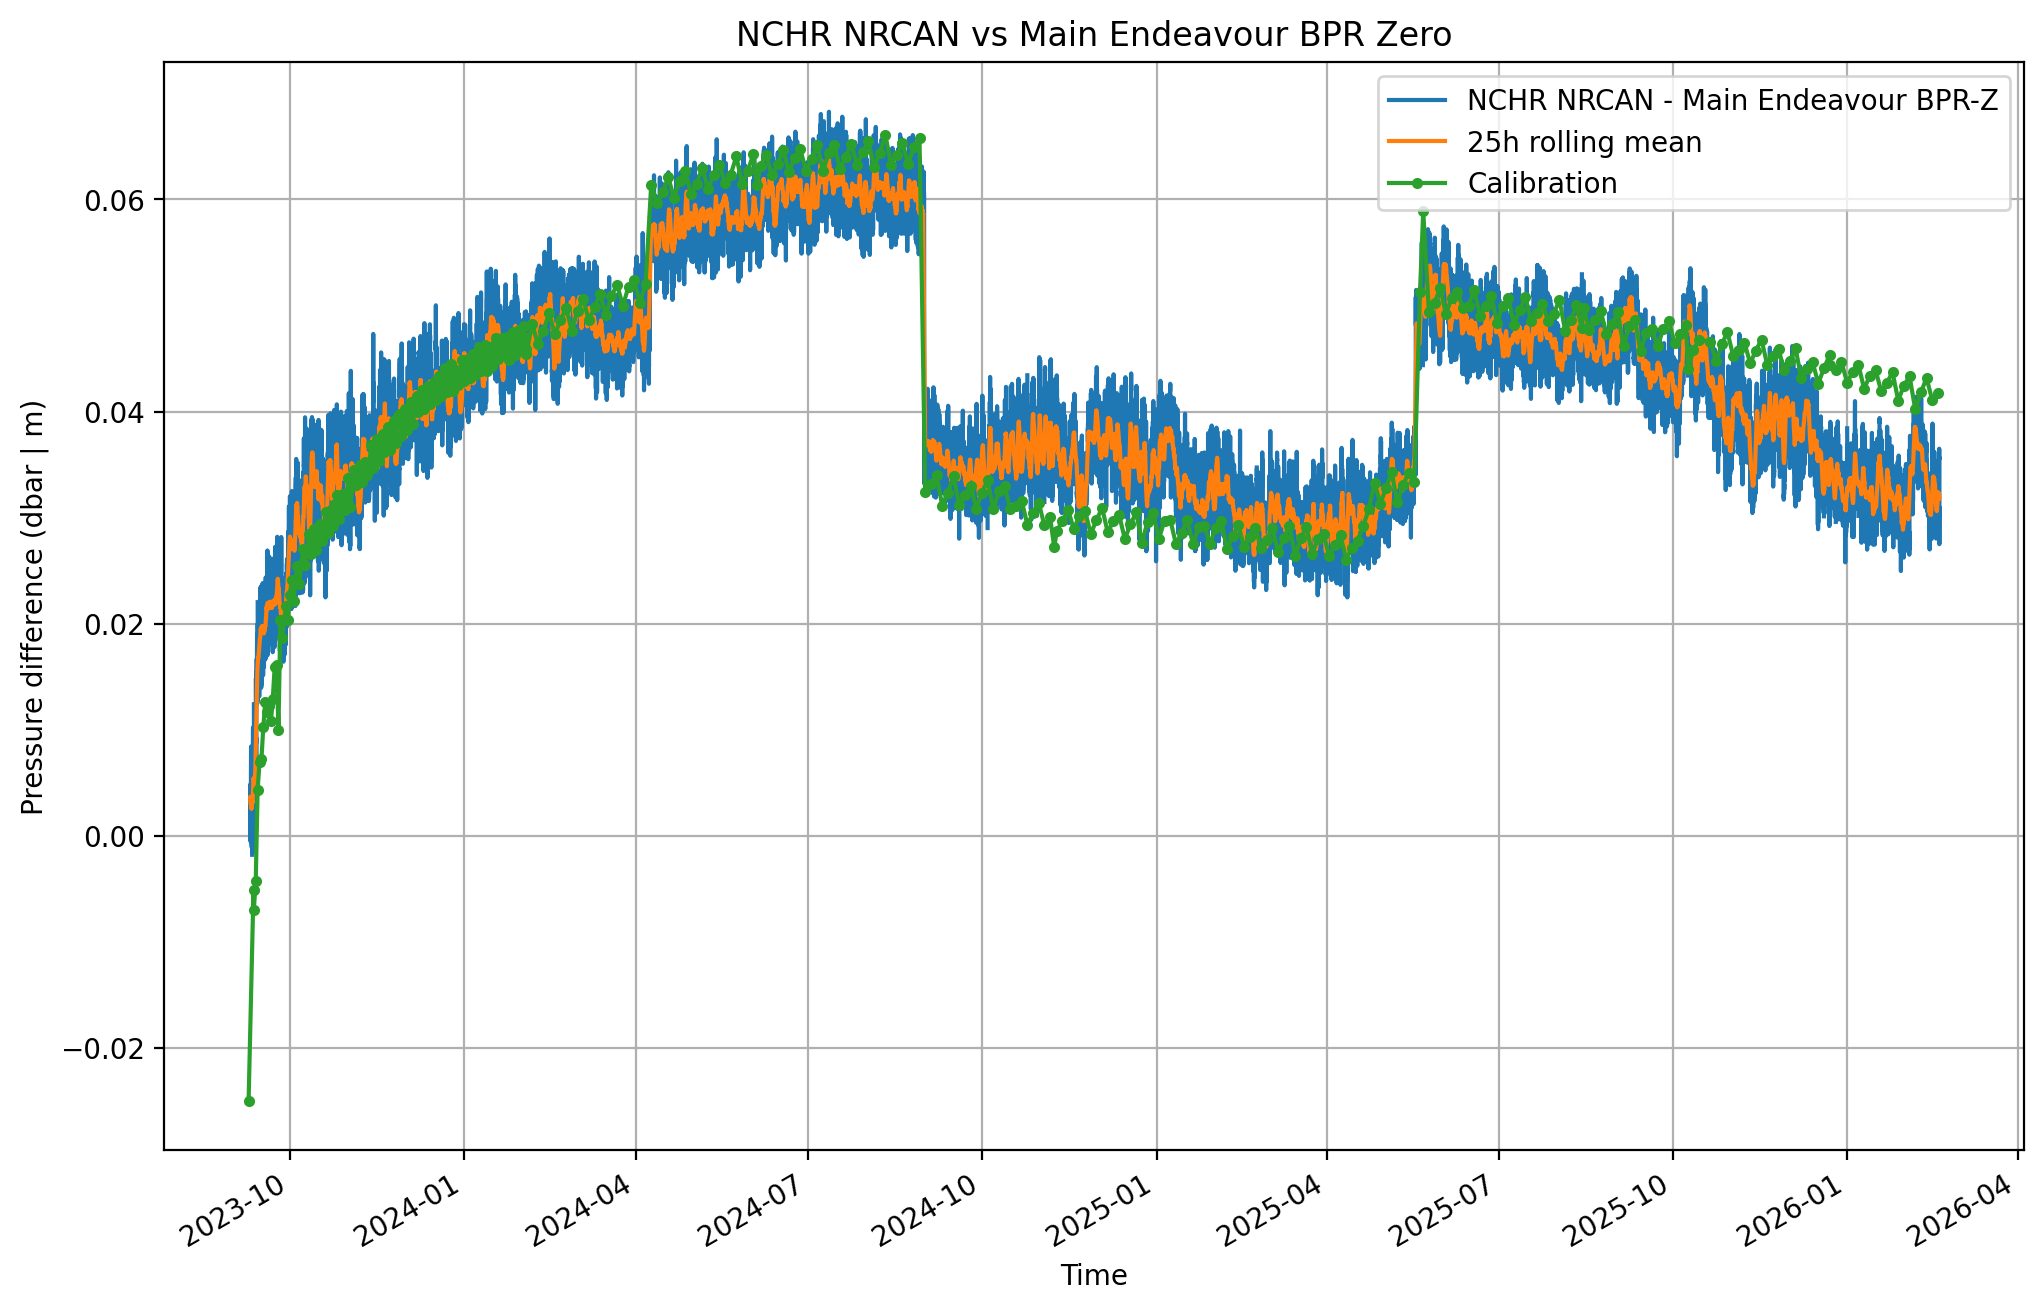

In [77]:
#MCHR NRCAN
# get NCHR for BPRZero dates and subtract BPRzero pressure
ec_diff = (nchr['values'].reindex_like(bpr_z['cleaned'])-bpr_z['cleaned'])

ec_diff = ec_diff - ec_diff.iloc[0]
ec_diff[ec_diff > 0.2] = float('nan')
ec_diff[ec_diff < -0.002] = float('nan')
ax = ec_diff.plot(grid=True, figsize=(12,8), label='NCHR NRCAN - Main Endeavour BPR-Z')
ec_diff.rolling('25h', center=True).mean().plot(ax=ax,grid=True, figsize=(12,8),label='25h rolling mean')

(-1*(cal - cal.iloc[0]) - 0.025).plot(ax = ax, figsize=(12,8), grid=True, marker='.', label='Calibration')

ax.set_xlabel('Time')
ax.set_ylabel('Pressure difference (dbar | m)')
ax.legend()
ax.set_title('NCHR NRCAN vs Main Endeavour BPR Zero')

Text(0.5, 1.0, 'KEMO NRCAN vs Main Endeavour BPR Zero')

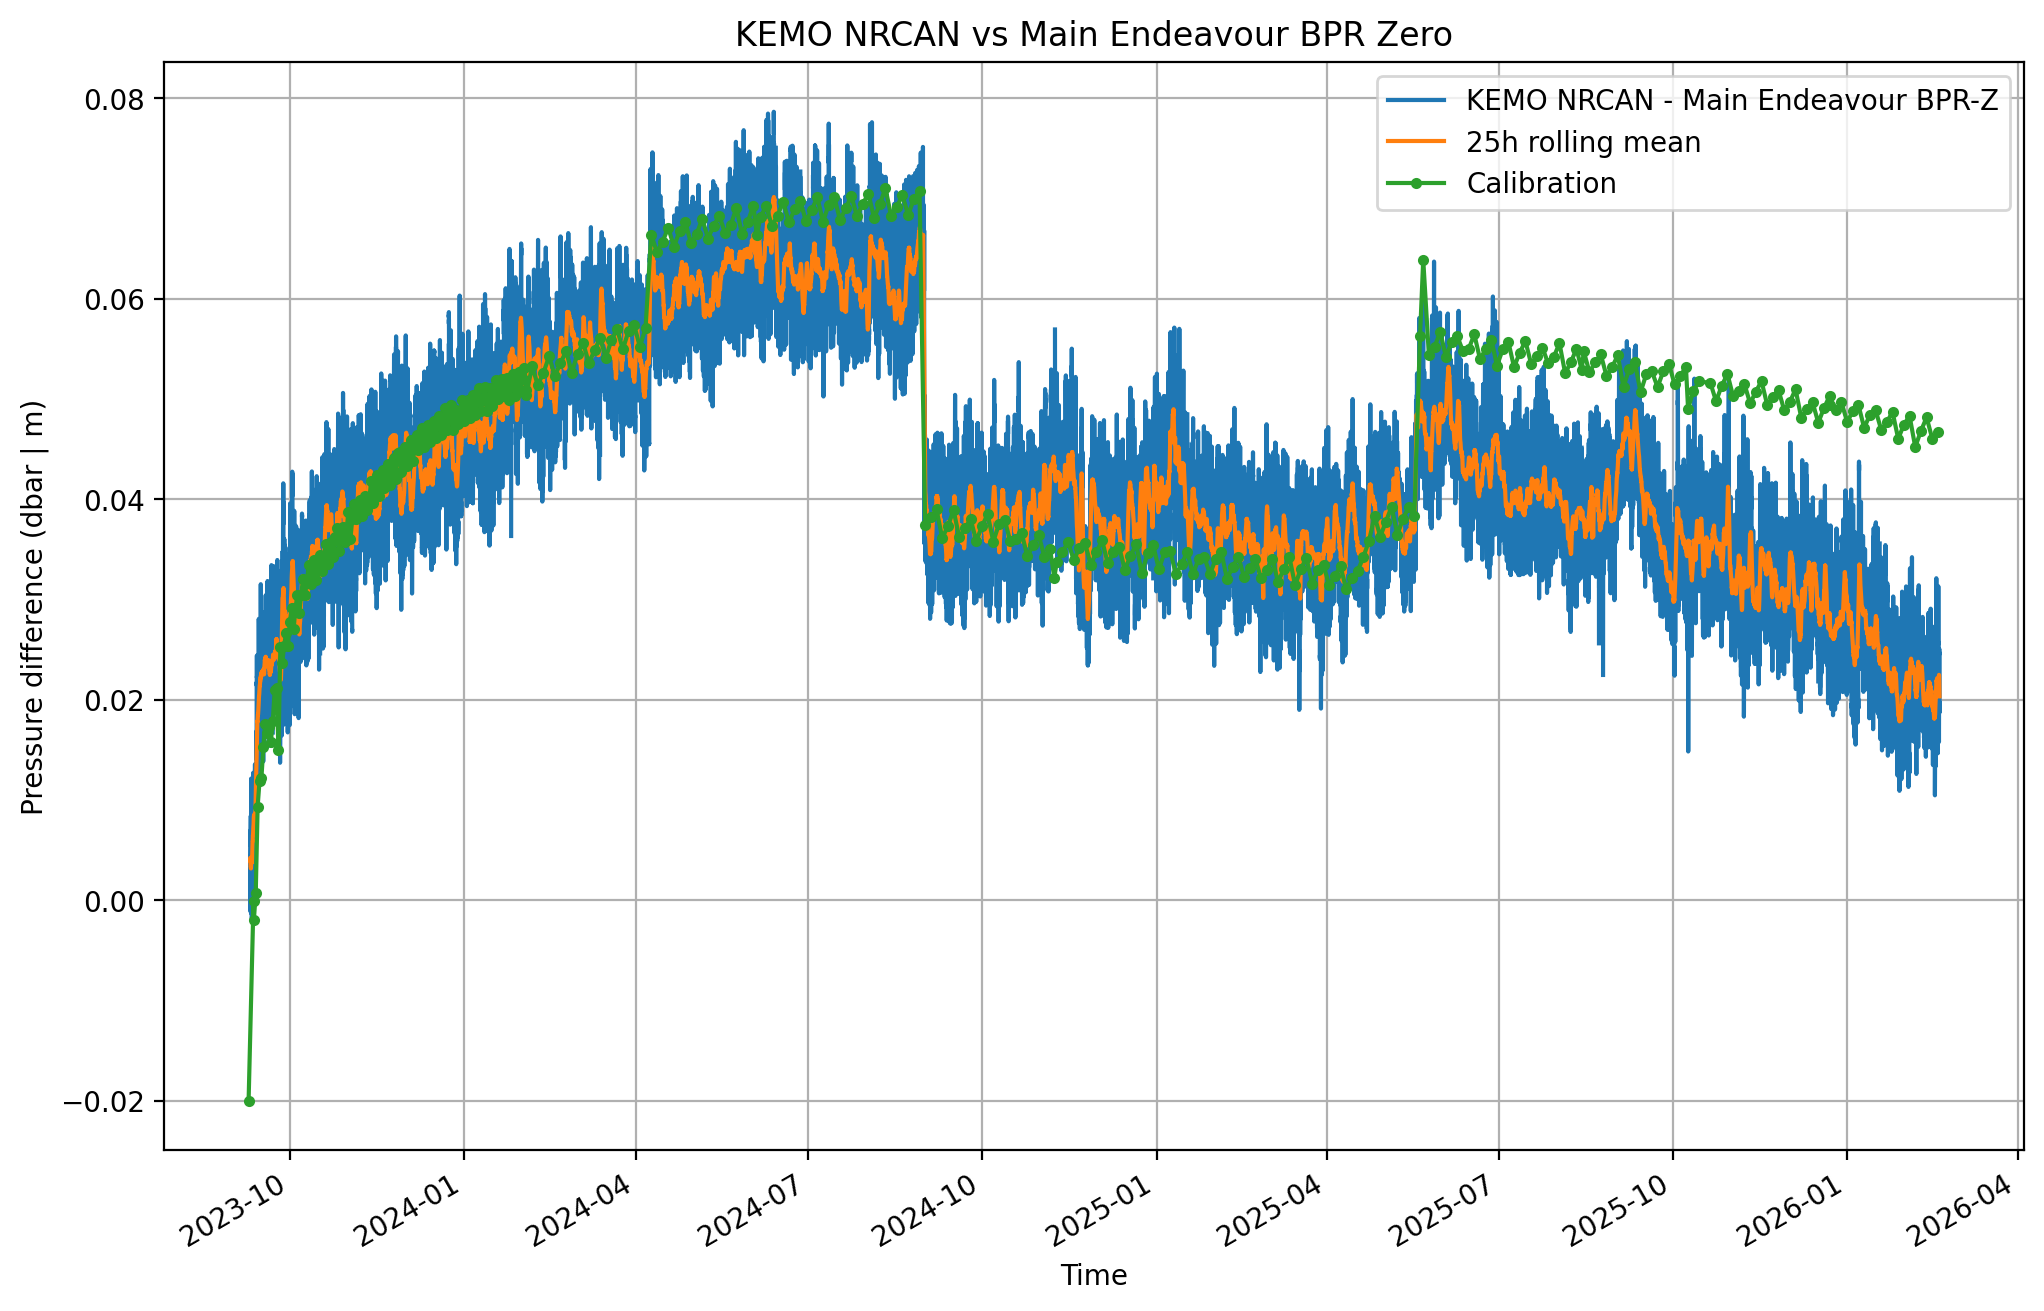

In [78]:
#KEMO NRCAN
# get KEMO for BPRZero dates and subtract BPRzero pressure
ec_diff = (kemo['values'].reindex_like(bpr_z['cleaned'])-bpr_z['cleaned'])

ec_diff = ec_diff - ec_diff.iloc[0]
ec_diff[ec_diff > 0.2] = float('nan')
ec_diff[ec_diff < -0.002] = float('nan')
ax = ec_diff.plot(grid=True, figsize=(12,8), label='KEMO NRCAN - Main Endeavour BPR-Z')
ec_diff.rolling('25h', center=True).mean().plot(ax=ax,grid=True, figsize=(12,8),label='25h rolling mean')

(-1*(cal - cal.iloc[0]) - 0.02).plot(ax = ax, figsize=(12,8), grid=True, marker='.', label='Calibration')

ax.set_xlabel('Time')
ax.set_ylabel('Pressure difference (dbar | m)')
ax.legend()
ax.set_title('KEMO NRCAN vs Main Endeavour BPR Zero')

### Compare ENEF and KEMF

<Axes: xlabel='sampleTimes'>

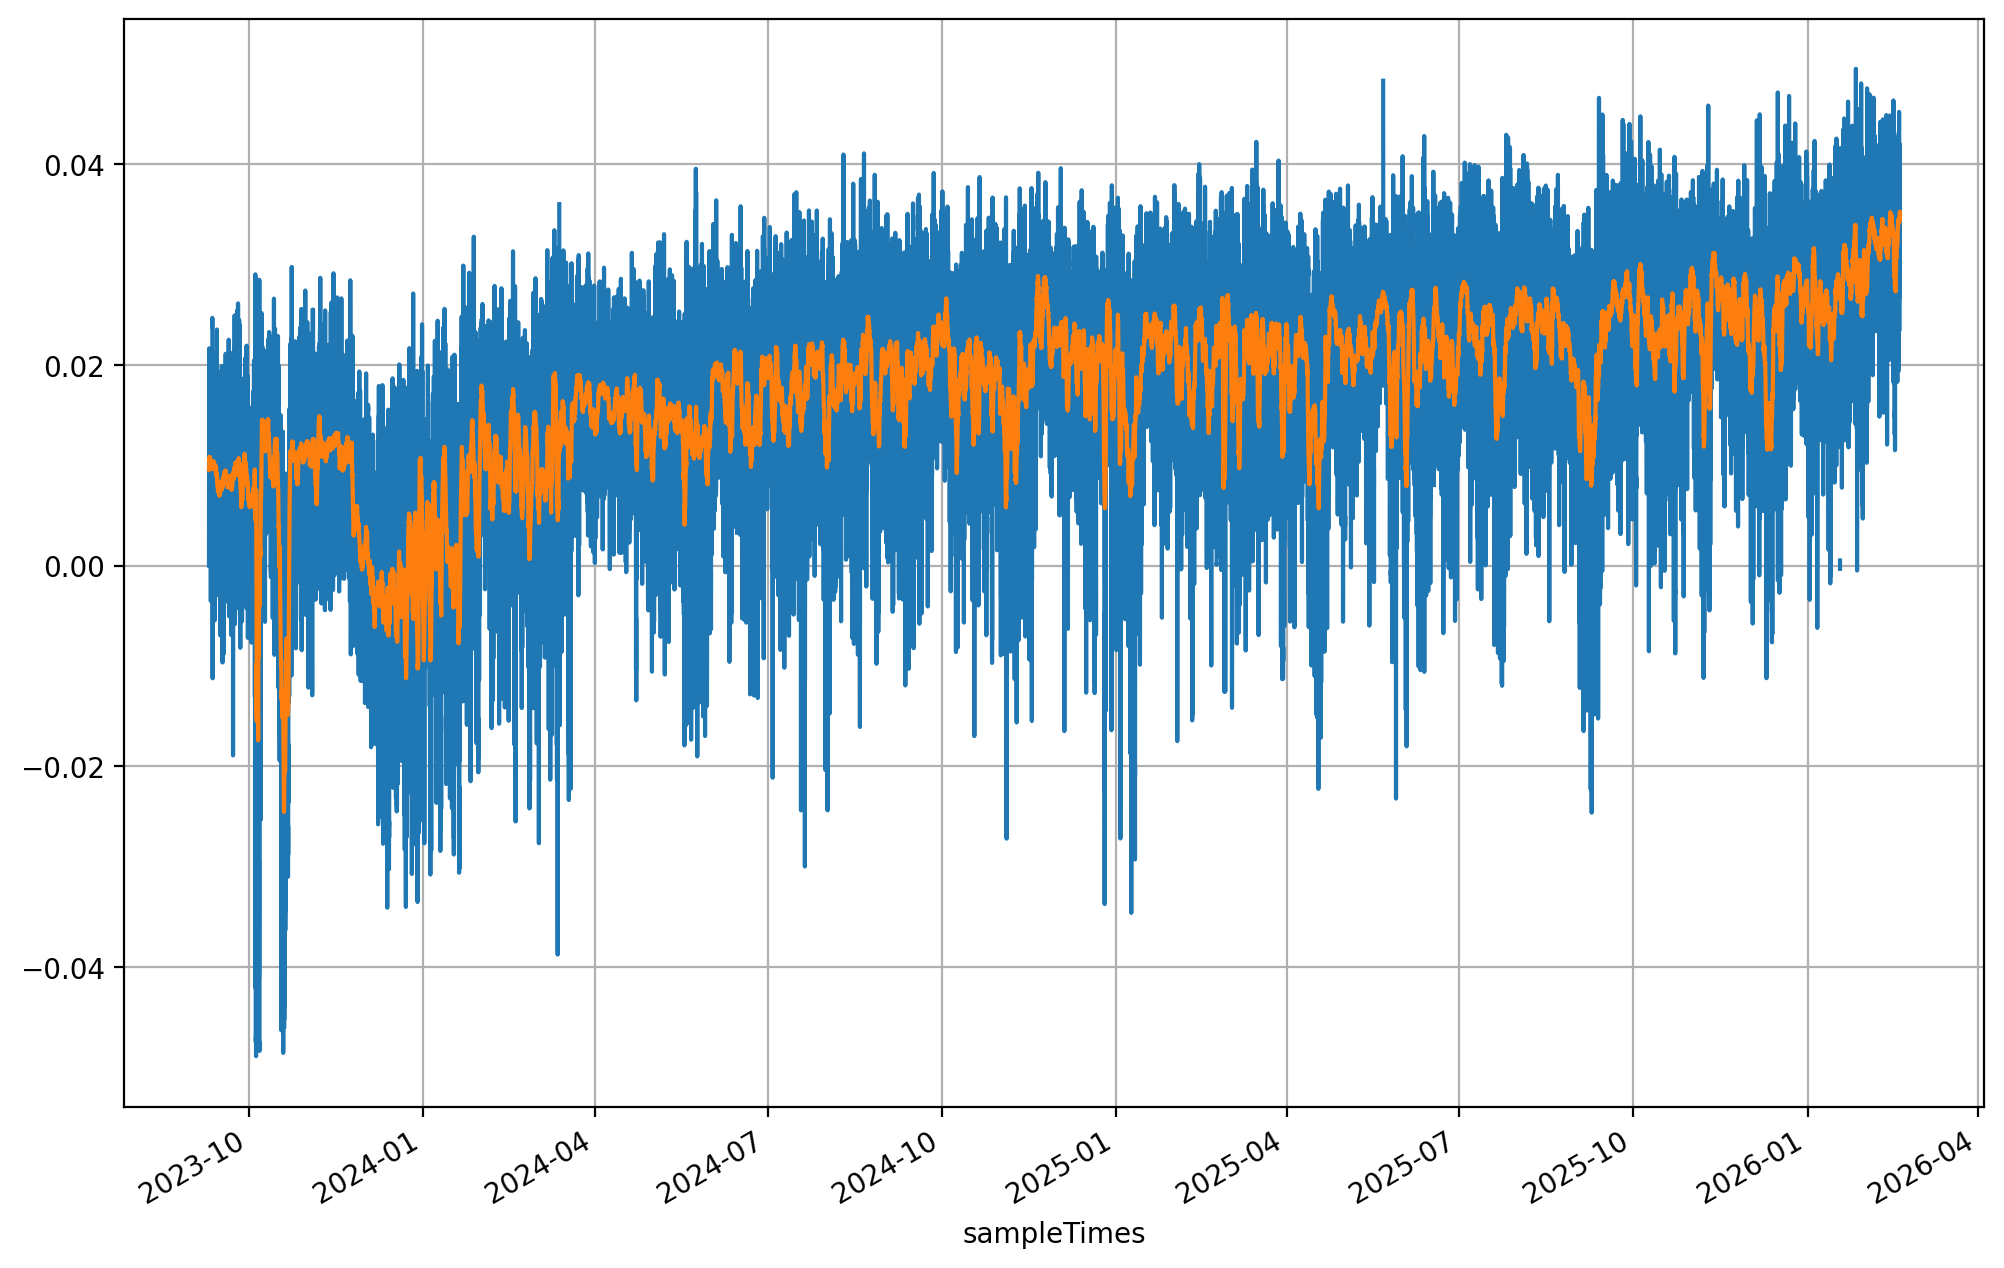

In [70]:
ec_diff = (enef['values'].reindex_like(kemf['values'])-kemf['values'])
ec_diff = ec_diff - ec_diff.iloc[0]
ec_diff[ec_diff > 0.05] = float('nan')
ec_diff[ec_diff < -0.05] = float('nan')
ec_diff.plot(grid=True, figsize=(12,8))
ec_diff.rolling('25h', center=True).mean().plot(grid=True, figsize=(12,8))
#(-1*(cal - cal.iloc[0]) - 0.02).plot(figsize=(12,8), grid=True, marker='.')

# All in one plot

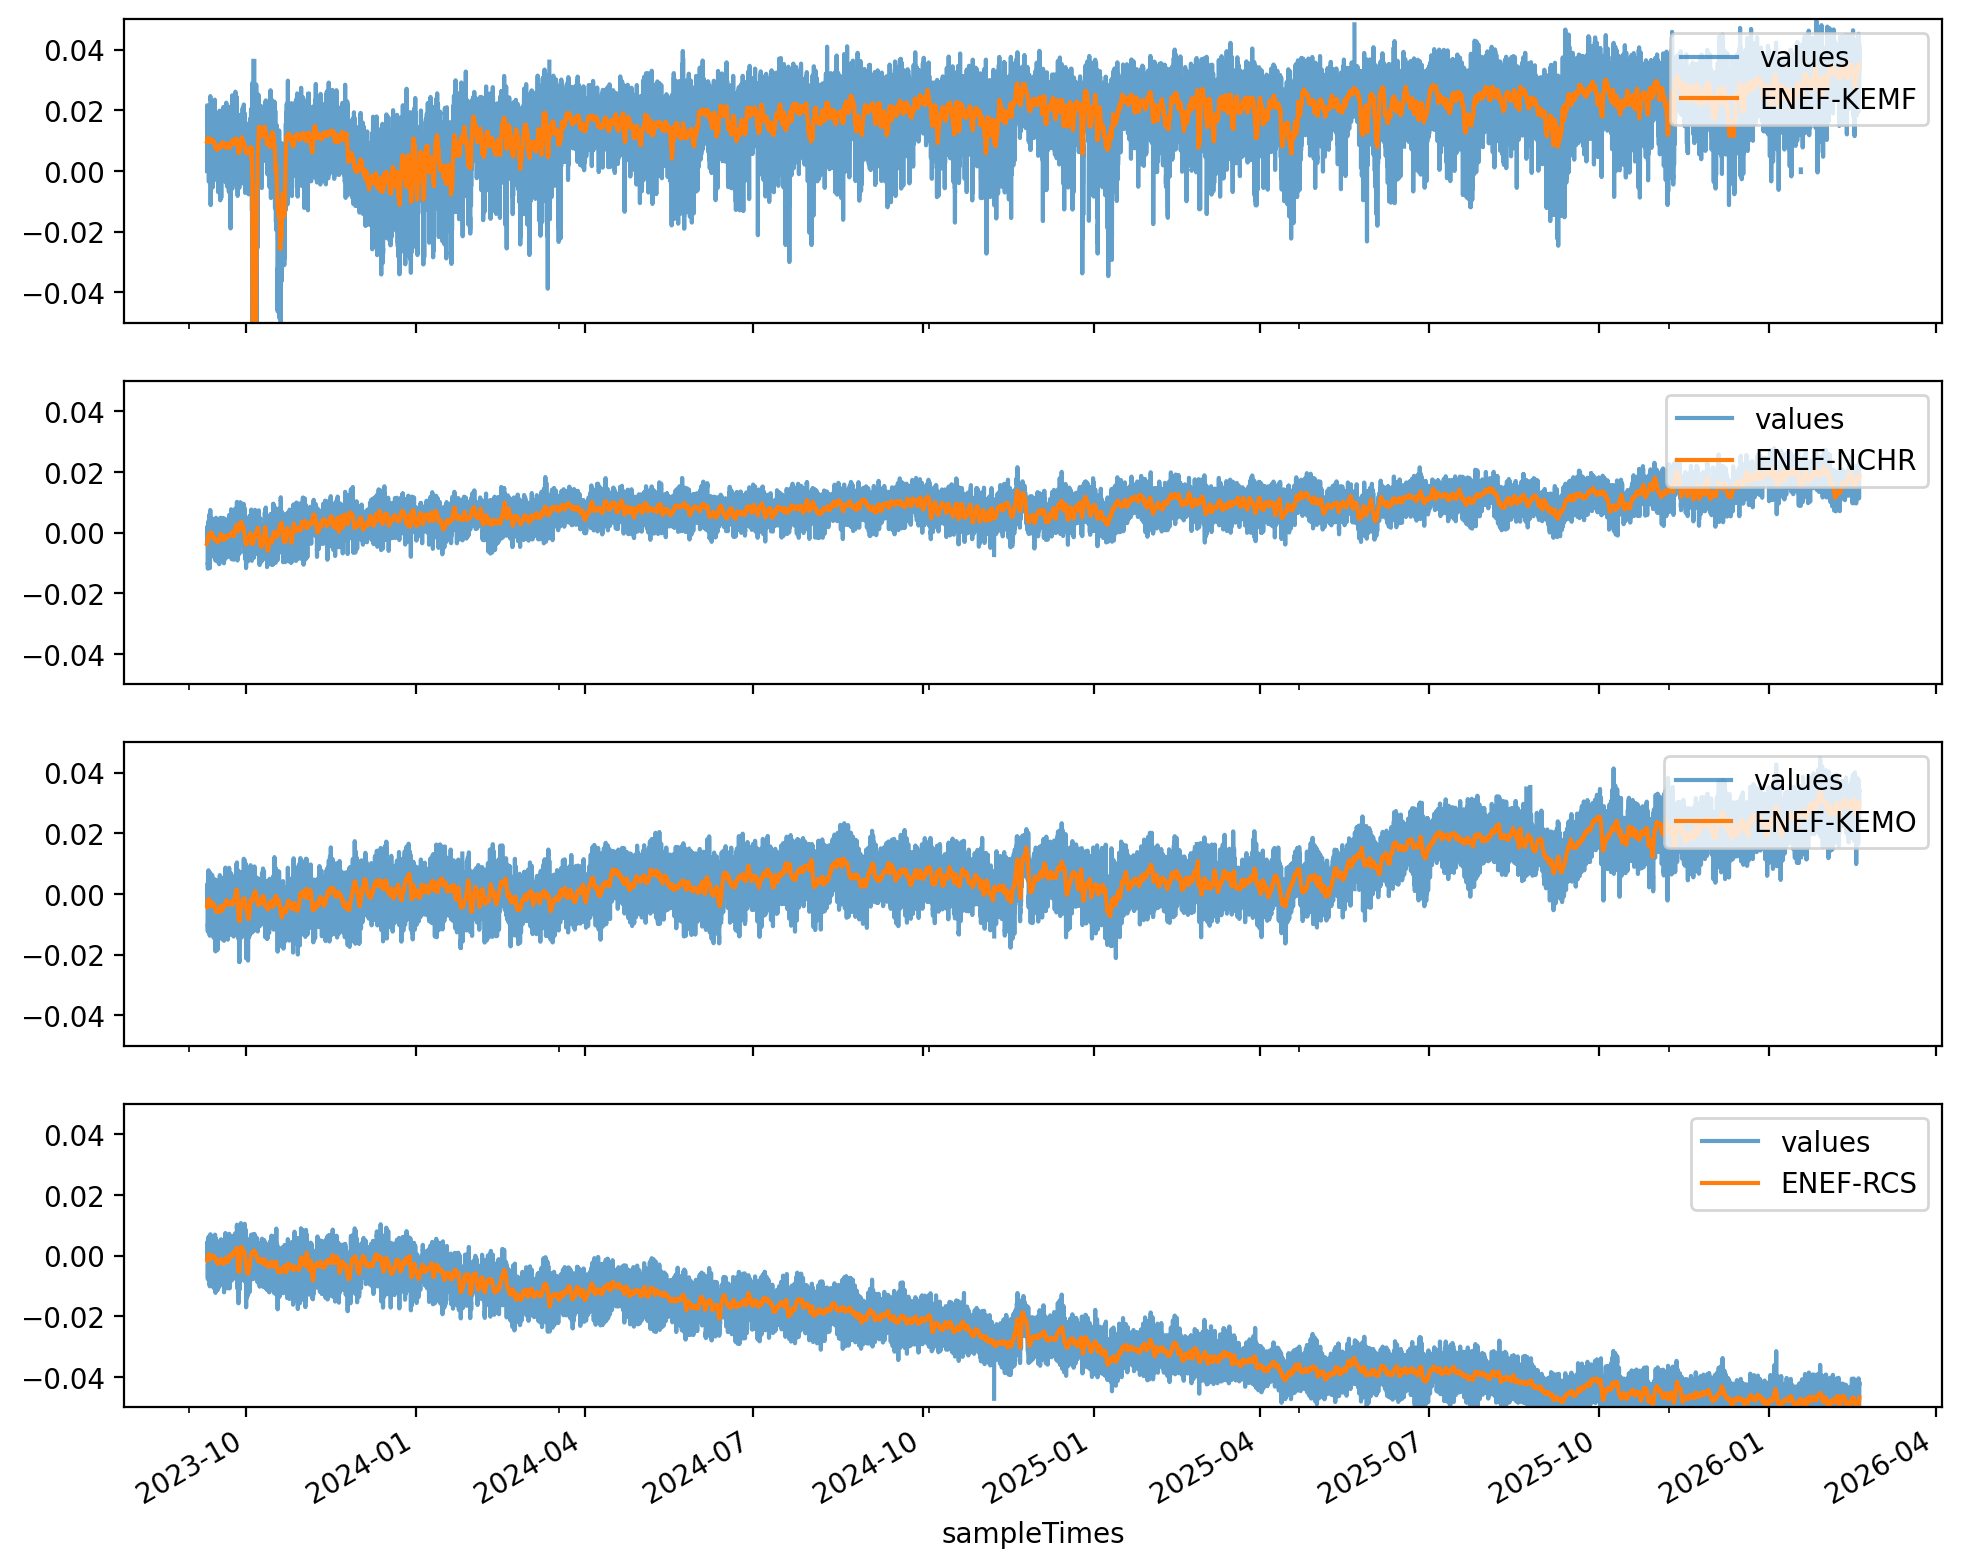

In [71]:
enf_kemf_diff = (enef['values'].reindex_like(kemf['values'])-kemf['values'])
enf_nchr_diff = (enef['values'].reindex_like(nchr['values'])-nchr['values'])
enf_rcs_diff = (enef['values'].reindex_like(rcs['values'])-rcs['values'])
enf_kemo_diff = (enef['values'].reindex_like(kemo['values'])-kemo['values'])

def correct_diff(ec_diff):

    ec_diff = ec_diff - ec_diff.iloc[0]
    ec_diff[ec_diff > 0.05] = float('nan')
    ec_diff[ec_diff < -0.05] = float('nan')
    return(ec_diff)

enf_kemf_diff = correct_diff(enf_kemf_diff)
enf_nchr_diff = correct_diff(enf_nchr_diff)
enf_rcs_diff = correct_diff(enf_rcs_diff)
enf_kemo_diff = correct_diff(enf_kemo_diff)




# Define your data and labels to avoid repetition
data_list = [
    (enf_kemf_diff, 'ENEF-KEMF'),
    (enf_nchr_diff, 'ENEF-NCHR'),
    (enf_kemo_diff, 'ENEF-KEMO'),
    (enf_rcs_diff, 'ENEF-RCS')
]

fig, axs = plt.subplots(len(data_list), 1, sharex=True, sharey=False, figsize=(10, 8))
for i, (df, label) in enumerate(data_list):
    # Plot raw values
    df.plot(ax=axs[i], grid=True, label='values', alpha=0.7)
    
    # Plot rolling mean
    df.rolling('25h', center=True).mean().plot(ax=axs[i], label=label)
    
    # CRITICAL: Force the axis to ignore global scaling and look at its own data
    axs[i].relim()
    axs[i].autoscale_view()
    
    axs[i].legend(loc='upper right')
    axs[i].set_ylim([-0.05,0.05])

plt.tight_layout()
plt.show()


### get BPRZero baroPressure

In [125]:
baroP = getData('MEFS', 'BPR', sensorCategoryCodes = 'pressure4', dateFrom = '2023-09-30T00:00:00.000Z', session = None)
baroT = getData('MEFS', 'BPR', sensorCategoryCodes = 'temperature3', dateFrom = '2023-09-30T00:00:00.000Z', session = None)

2023-09-30T00:00:00.000Z
2023-09-30T00:00:00.000Z


In [91]:
baroP

counts       max  maxQuality  \
sampleTimes                                               
2023-09-30 00:07:30+00:00    7200  9.595939           0   
2023-09-30 00:22:30+00:00    7200  9.595824           0   
2023-09-30 00:37:30+00:00    7200  9.595682           0   
2023-09-30 00:52:30+00:00    7200  9.595602           0   
2023-09-30 01:07:30+00:00    7200  9.595558           0   
...                           ...       ...         ...   
2026-02-18 17:52:30+00:00    7200  9.588547           0   
2026-02-18 18:07:30+00:00    7200  9.588556           0   
2026-02-18 18:22:30+00:00    7200  9.588843           0   
2026-02-18 18:37:30+00:00    7200  9.589103           0   
2026-02-18 18:52:30+00:00    7200  9.589218           0   

                                           maxTimes       min  minQuality  \
sampleTimes                                                                 
2023-09-30 00:07:30+00:00  2023-09-30T00:00:00.988Z  9.595819           0   
2023-09-30 00:22:30+00:00  2023-09-30T00:15:16.989Z  9.595678           0   
2023-09-30 00:37:30+00:00  2023-09-30T00:30:12.616Z  9.595596           0   
2023-09-30 00:52:30+00:00  2023-09-30T00:45:08.117Z  9.595552           0   
2023-09-30 01:07:30+00:00  2023-09-30T01:00:20.118Z  9.595514           0   
...                                             ...       ...         ...   
2026-02-18 17:52:30+00:00  2026-02-18T17:57:38.788Z  9.588451           0   
2026-02-18 18:07:30+00:00  2026-02-18T18:03:35.664Z  9.588526           0   
2026-02-18 18:22:30+00:00  2026-02-18T18:29:58.042Z  9.588544           0   
2026-02-18 18:37:30+00:00  2026-02-18T18:44:59.544Z  9.588837           0   
2026-02-18 18:52:30+00:00  2026-02-18T18:47:27.169Z  9.589080           0   

                                           minTimes  qaqcFlags  \
sampleTimes                                                      
2023-09-30 00:07:30+00:00  2023-09-30T00:14:50.863Z          7   
2023-09-30 00:22:30+00:00  2023-09-30T00:29:57.491Z          7   
2023-09-30 00:37:30+00:00  2023-09-30T00:44:51.242Z          7   
2023-09-30 00:52:30+00:00  2023-09-30T00:59:30.493Z          7   
2023-09-30 01:07:30+00:00  2023-09-30T01:13:41.495Z          7   
...                                             ...        ...   
2026-02-18 17:52:30+00:00  2026-02-18T17:47:45.537Z          7   
2026-02-18 18:07:30+00:00  2026-02-18T18:00:41.663Z          7   
2026-02-18 18:22:30+00:00  2026-02-18T18:15:15.540Z          7   
2026-02-18 18:37:30+00:00  2026-02-18T18:30:04.042Z          7   
2026-02-18 18:52:30+00:00  2026-02-18T18:55:09.170Z          7   

                                        sampleTimes    values  
sampleTimes                                                    
2023-09-30 00:07:30+00:00  2023-09-30T00:07:30.000Z  9.595865  
2023-09-30 00:22:30+00:00  2023-09-30T00:22:30.000Z  9.595750  
2023-09-30 00:37:30+00:00  2023-09-30T00:37:30.000Z  9.595634  
2023-09-30 00:52:30+00:00  2023-09-30T00:52:30.000Z  9.595573  
2023-09-30 01:07:30+00:00  2023-09-30T01:07:30.000Z  9.595535  
...                                             ...       ...  
2026-02-18 17:52:30+00:00  2026-02-18T17:52:30.000Z  9.588496  
2026-02-18 18:07:30+00:00  2026-02-18T18:07:30.000Z  9.588546  
2026-02-18 18:22:30+00:00  2026-02-18T18:22:30.000Z  9.588683  
2026-02-18 18:37:30+00:00  2026-02-18T18:37:30.000Z  9.588912  
2026-02-18 18:52:30+00:00  2026-02-18T18:52:30.000Z  9.589139  

[83788 rows x 10 columns]

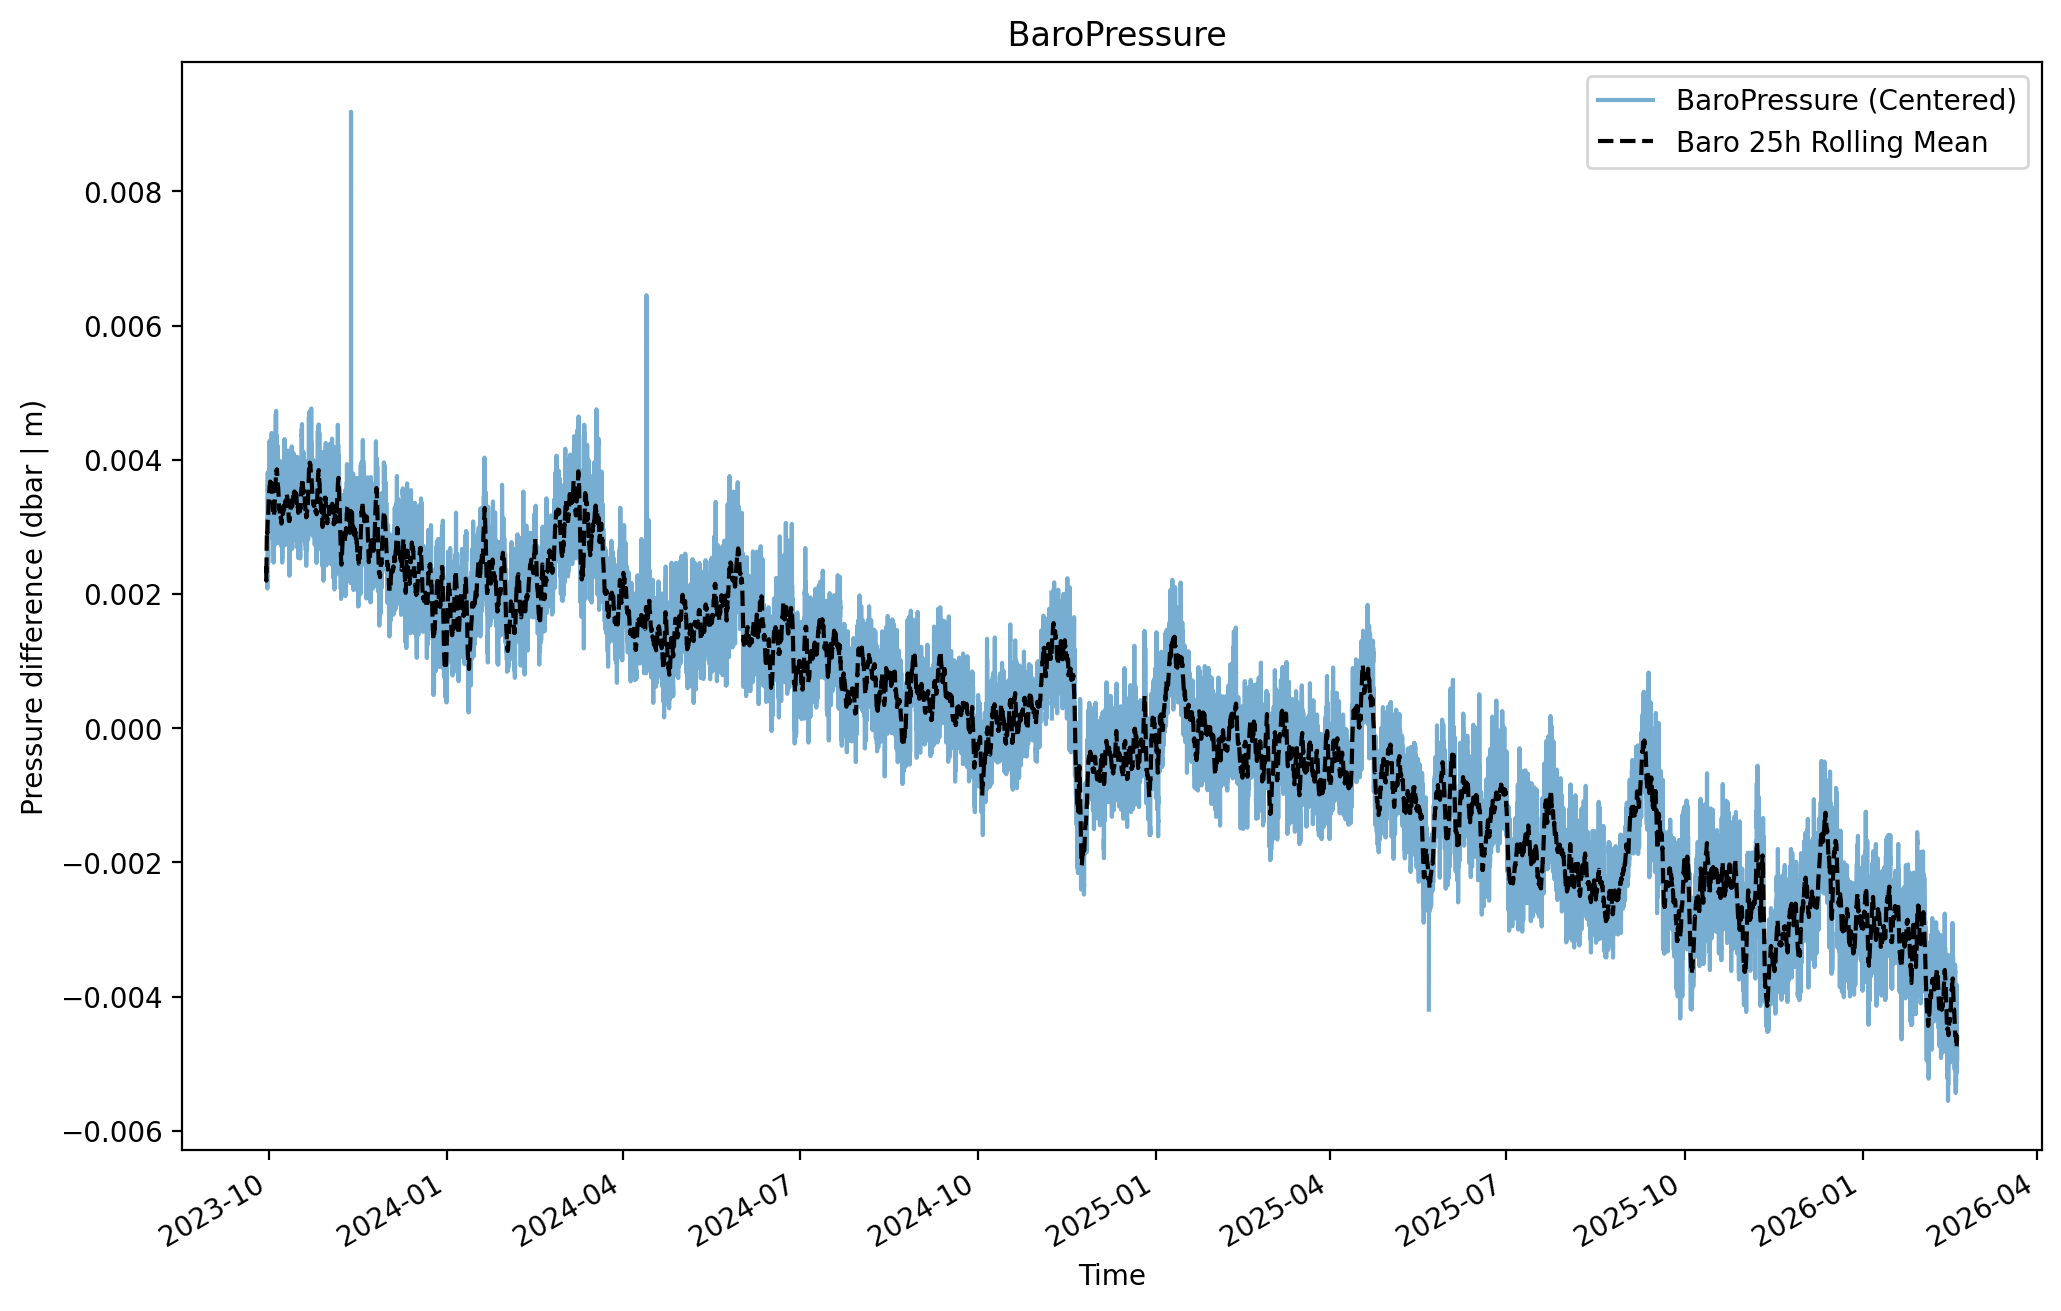

In [108]:
import matplotlib.pyplot as plt

# 1. Setup the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# 2. Process and Plot BaroPressure
# Reindexing ensures the time series align for comparison
ec_diff = baroP['values'].reindex_like(bpr_z['cleaned'])
ec_diff_centered = ec_diff - ec_diff.mean()

ec_diff_centered.plot(ax=ax, grid=True, label='BaroPressure (Centered)', alpha=0.6)

# 3. Plot the Rolling Mean for Baro
ec_diff_centered.rolling('25h', center=True).mean().plot(
    ax=ax, color='black', style='--', label='Baro 25h Rolling Mean'
)

# 5. Final touches
ax.set_xlabel('Time')
ax.set_ylabel('Pressure difference (dbar | m)')
ax.set_title(' BaroPressure')
ax.legend(loc='best')

plt.show()

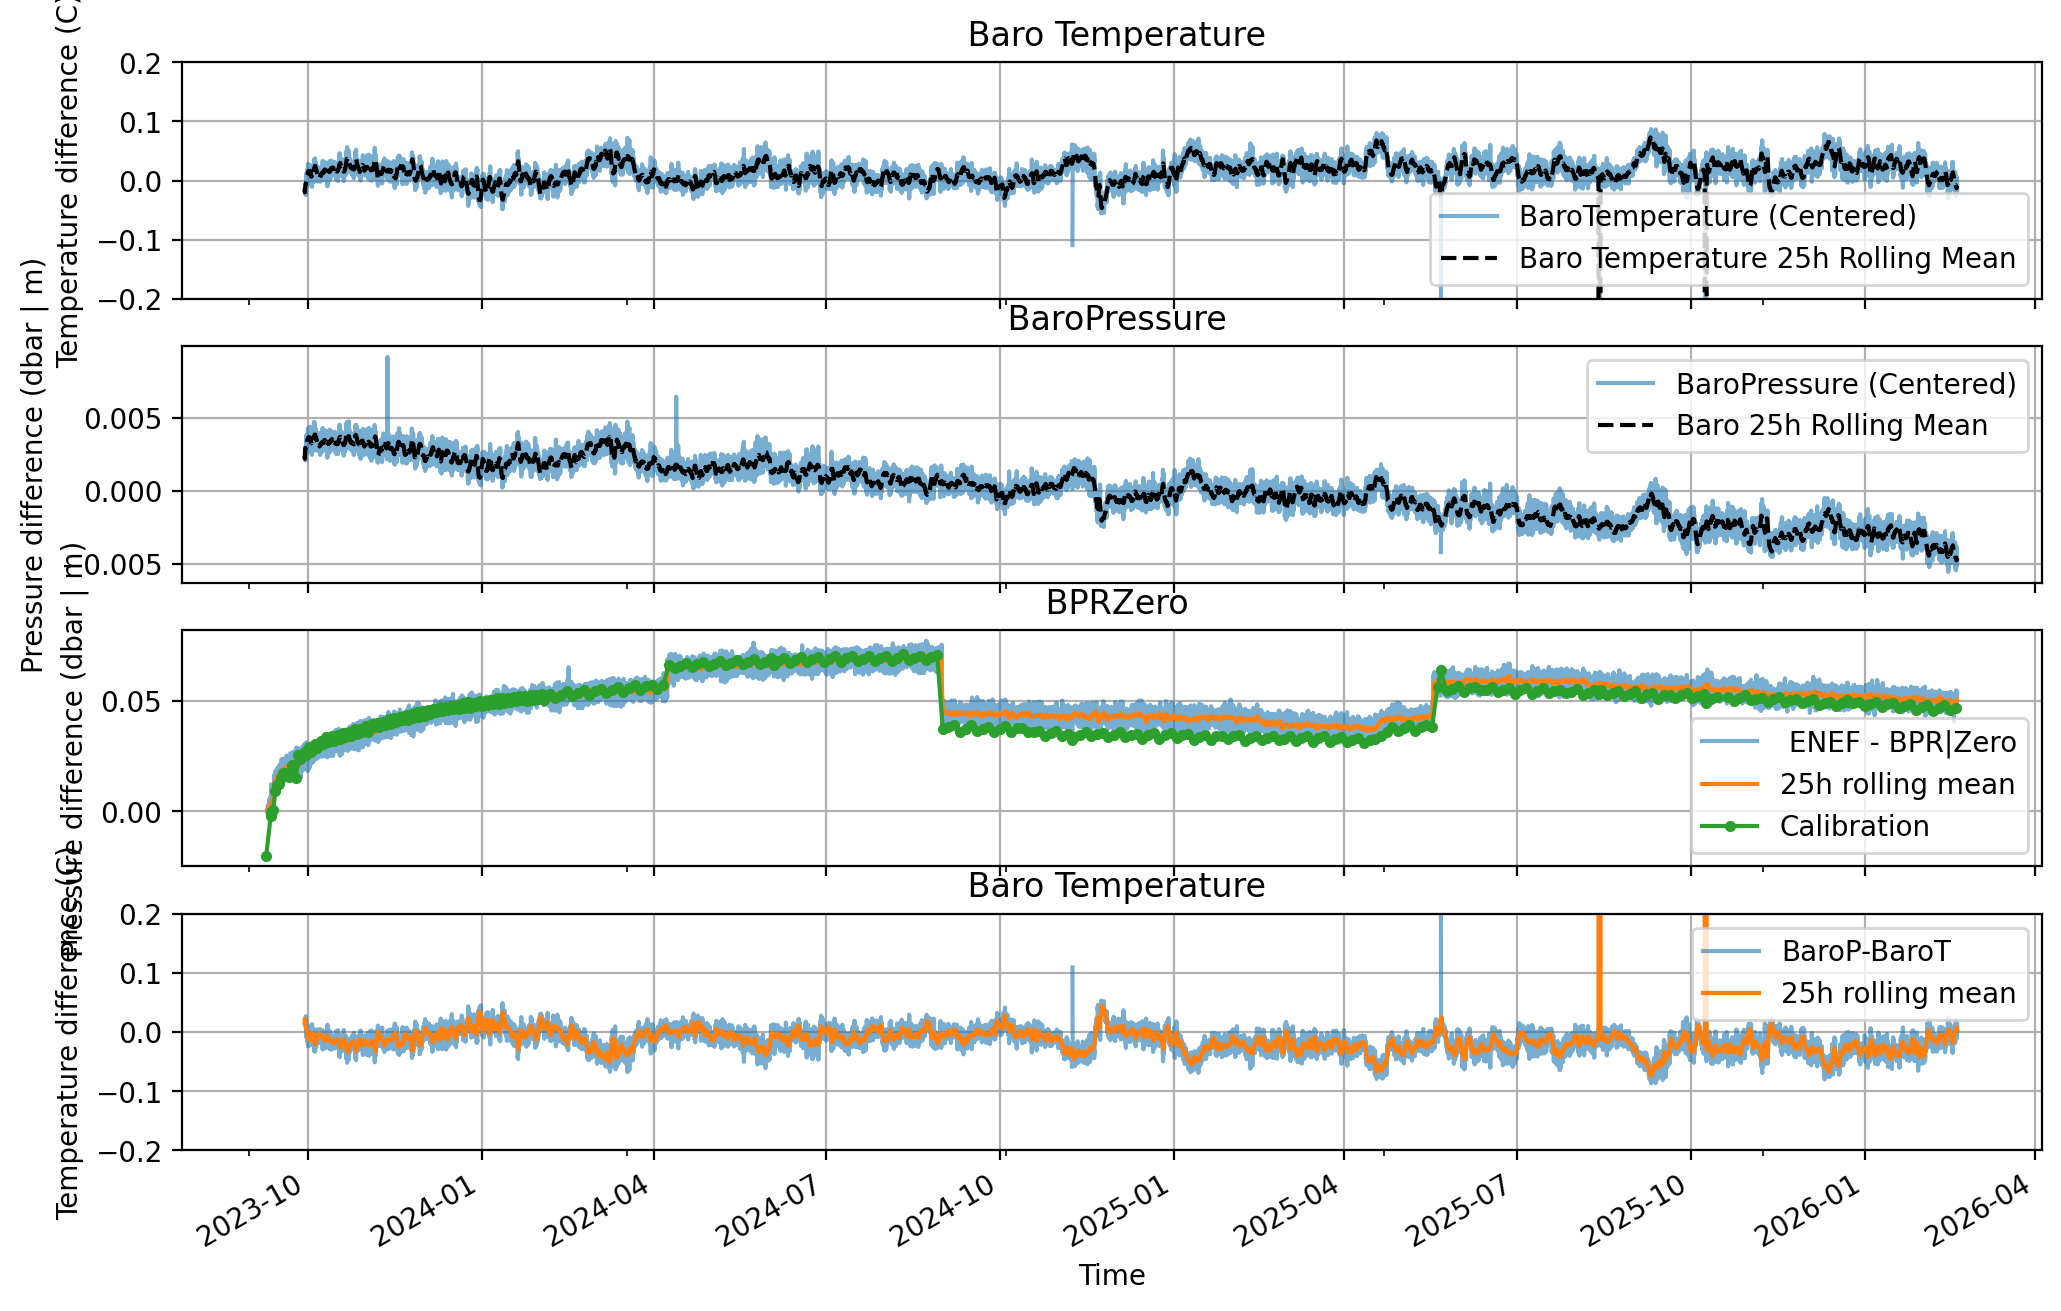

In [137]:
# ENEF comparison
# get ENEF for BPRZero dates and subtract BPRzero pressure
enf_diff = (enef['values'].reindex_like(bpr_z['cleaned'])-bpr_z['cleaned'])

enf_diff = enf_diff - enf_diff.iloc[0]
enf_diff[enf_diff > 0.2] = float('nan')
enf_diff[enf_diff < -0.002] = float('nan')

# 1. Setup the figure and axis
fig, ax = plt.subplots(4,1,figsize=(12, 8),sharex=True)

# 1a. Plot BaroPressure
et_diff = baroT['values'].reindex_like(bpr_z['cleaned'])
et_diff_centered = et_diff - et_diff.mean()


et_diff_centered.plot(ax=ax[0], grid=True, label='BaroTemperature (Centered)', alpha=0.6)
et_diff_centered.rolling('25h', center=True).mean().plot(grid=True,
    ax=ax[0], color='black', style='--', label='Baro Temperature 25h Rolling Mean'
)


# 2. Process and Plot BaroPressure 
# Reindexing ensures the time series align for comparison
ec_diff = baroP['values'].reindex_like(bpr_z['cleaned'])
ec_diff_centered = ec_diff - ec_diff.mean()

ec_diff_centered.plot(ax=ax[1], grid=True, label='BaroPressure (Centered)', alpha=0.6)

# 3. Plot the Rolling Mean for Baro
ec_diff_centered.rolling('25h', center=True).mean().plot(grid=True,
    ax=ax[1], color='black', style='--', label='Baro 25h Rolling Mean'
)

# 4. Process and Plot BPRZero

enf_diff.plot(ax=ax[2], grid=True, label=' ENEF - BPR|Zero', alpha=0.6)
enf_diff.rolling('25h', center=True).mean().plot(ax=ax[2],grid=True, figsize=(12,8),label='25h rolling mean')

# adjust the calibrations to fit the drift curve at the beginning (exponential part)
(-1*(cal - cal.iloc[0]) - 0.02).plot(ax = ax[2], figsize=(12,8), grid=True, marker='.', label='Calibration')

# remove baroT from baroP
new_ec = ec_diff_centered - et_diff_centered
new_ec.plot(ax=ax[3], grid=True, label='BaroP-BaroT', alpha=0.6)
new_ec.rolling('25h', center=True).mean().plot(ax=ax[3],grid=True, figsize=(12,8),label='25h rolling mean')

# 6. Final touches
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Temperature difference (C)')
ax[0].set_title(' Baro Temperature')
ax[0].set_ylim([-0.2,0.2])
ax[0].legend(loc='best')

ax[1].set_xlabel('Time')
ax[1].set_ylabel('Pressure difference (dbar | m)')
ax[1].set_title(' BaroPressure')
ax[1].legend(loc='best')

ax[2].set_xlabel('Time')
ax[2].set_ylabel('Pressure difference (dbar | m)')
ax[2].set_title(' BPRZero')
ax[2].legend(loc='best')

ax[3].set_xlabel('Time')
ax[3].set_ylabel('Temperature difference (C)')
ax[3].set_title(' Baro Temperature')
ax[3].set_ylim([-0.2,0.2])
ax[3].legend(loc='best')



plt.show()

Text(0.5, 1.0, 'KEMF NRCAN vs Main Endeavour BPR Zero')

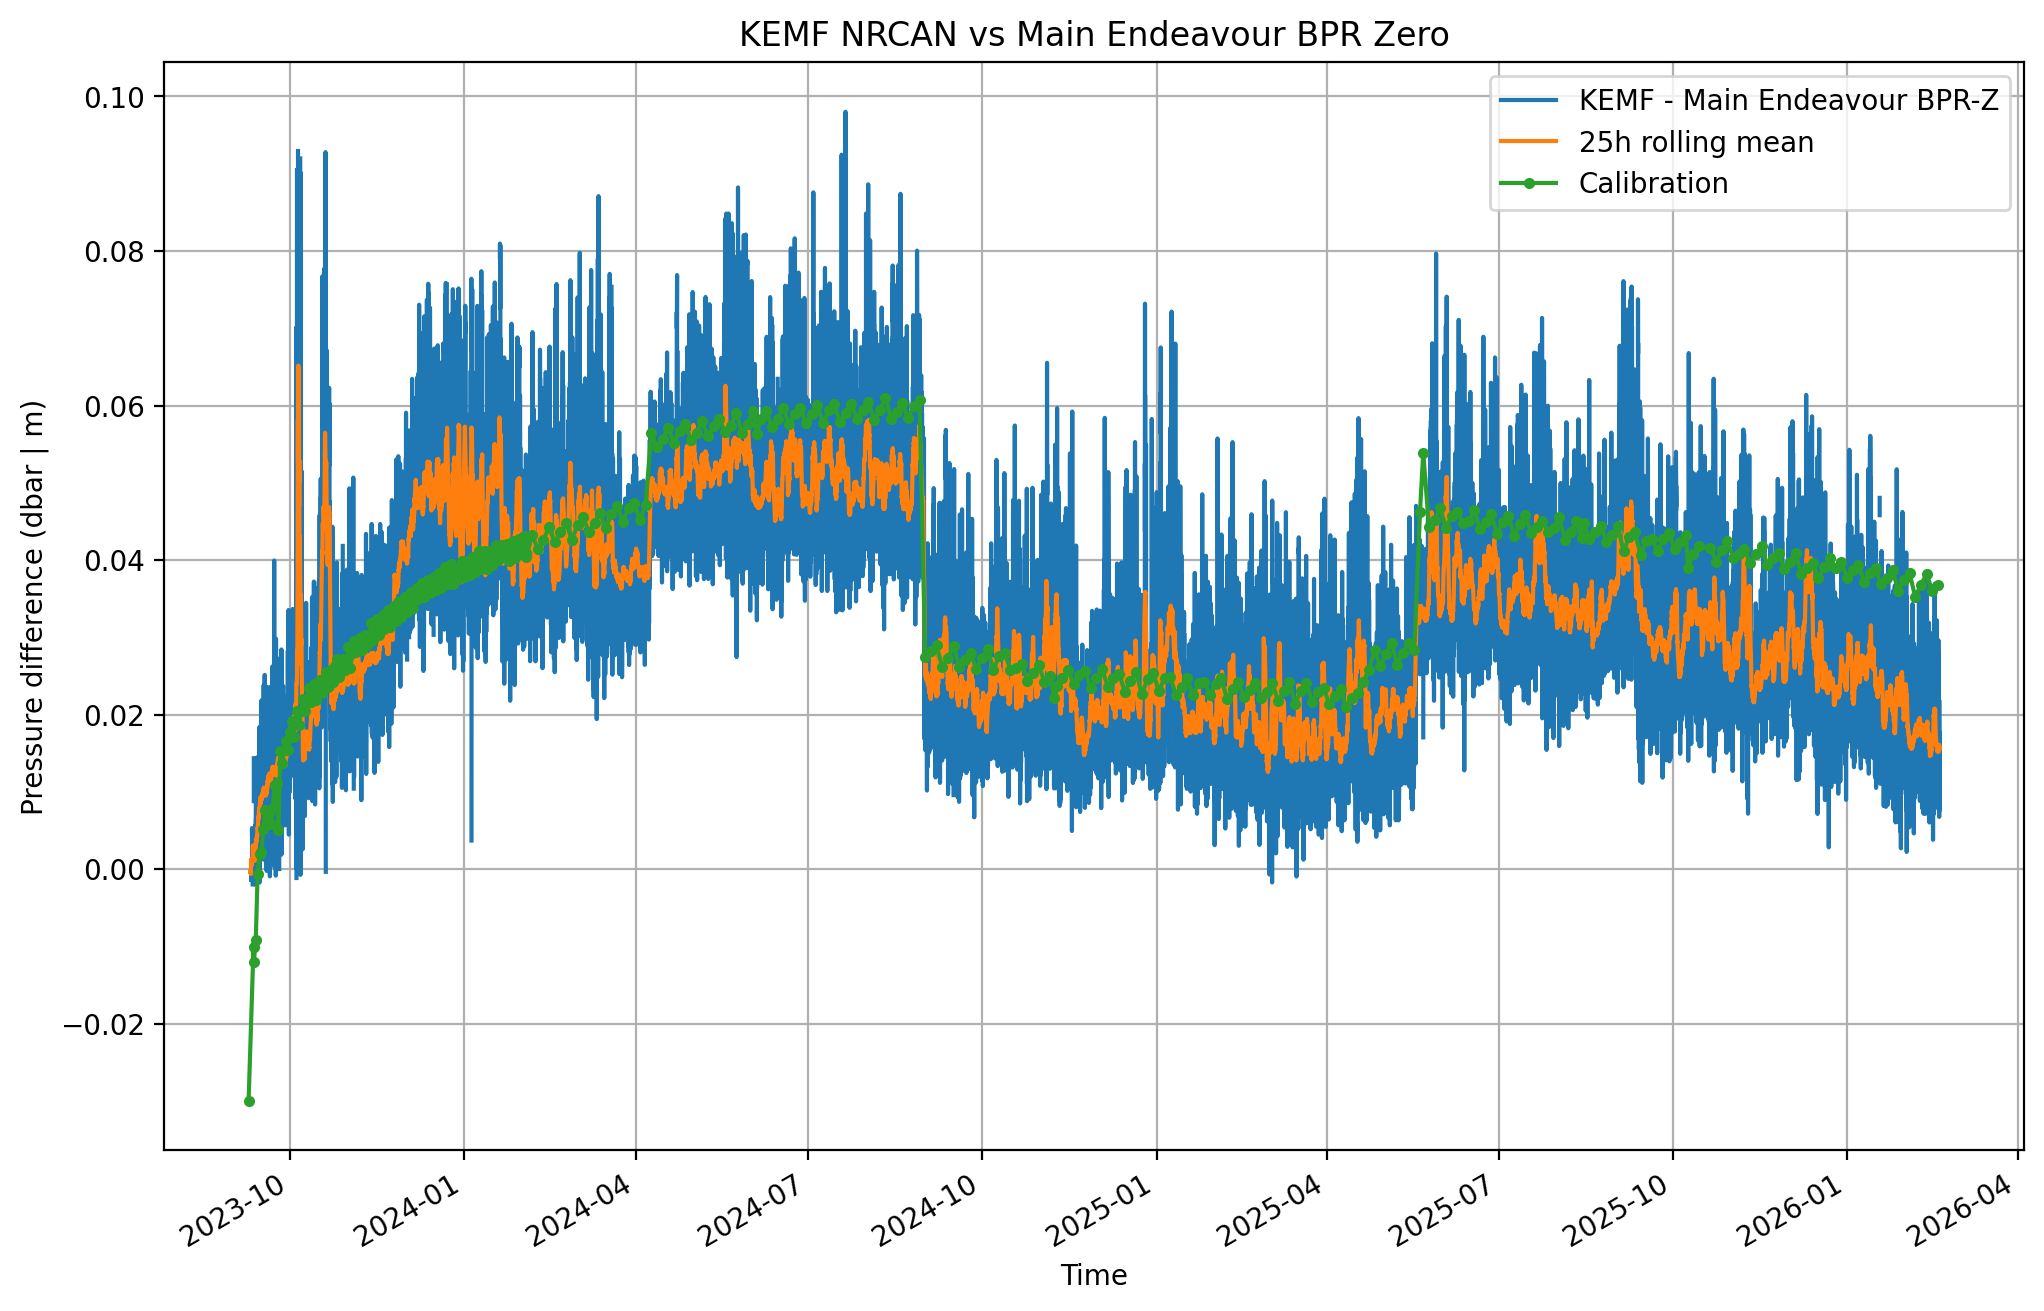

In [ ]:
#KEMF NRCAN 
# get KEMF for BPRZero dates and subtract BPRzero pressure
ec_diff = (kemf['values'].reindex_like(bpr_z['cleaned'])-bpr_z['cleaned'])

ec_diff = ec_diff - ec_diff.iloc[0]
ec_diff[ec_diff > 0.1] = float('nan')
ec_diff[ec_diff < -0.002] = float('nan')
ax = ec_diff.plot(grid=True, figsize=(12,8), label='KEMF - Main Endeavour BPR-Z')
ec_diff.rolling('25h', center=True).mean().plot(ax=ax,grid=True, figsize=(12,8),label='25h rolling mean')

(-1*(cal - cal.iloc[0]) - 0.03).plot(ax = ax, figsize=(12,8), grid=True, marker='.', label='Calibration')

ax.set_xlabel('Time')
ax.set_ylabel('Pressure difference (dbar | m)')
ax.legend()
ax.set_title('KEMF NRCAN vs Main Endeavour BPR Zero')



<Axes: xlabel='sampleTimes'>

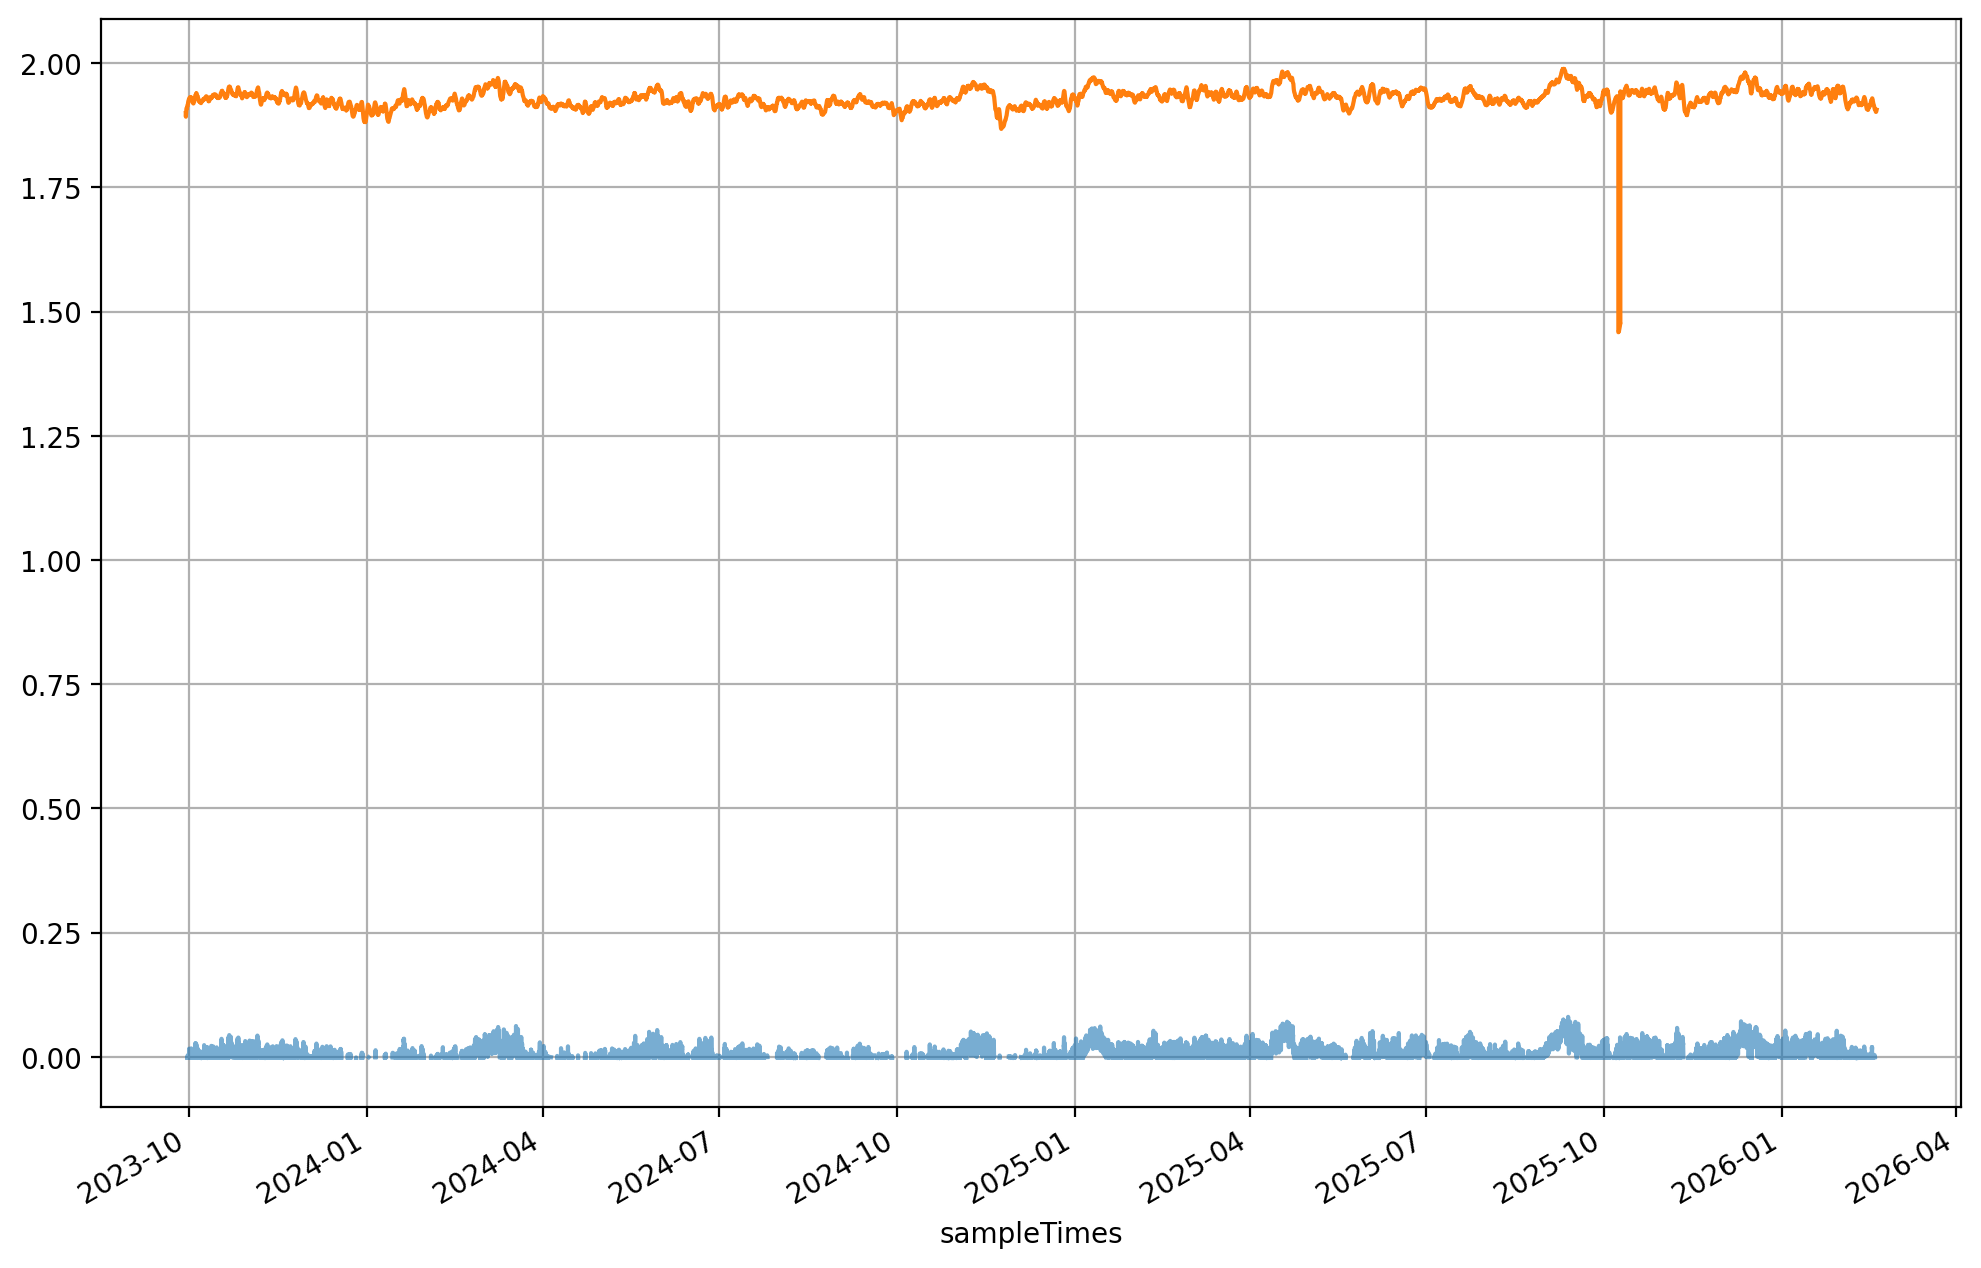

In [120]:
fig, ax = plt.subplots(figsize=(12, 8))

et_diff_centered[et_diff_centered > 0.2] = float('nan')
et_diff_centered[et_diff_centered < -0.2] = float('nan')
et_diff_centered.plot(ax=ax, grid=True, label='ParoTemperature (Centered)', alpha=0.6)
et_diff.rolling('25h', center=True).mean().plot(ax=ax,grid=True, figsize=(12,8),label='25h rolling mean')